In [2]:
%matplotlib inline

In [1]:
# imports
from __future__ import print_function,absolute_import,division,unicode_literals
import numpy as np
import glob,os,sys,copy,imp 
from scipy import stats as scistats
import matplotlib as mpl
mpl.rcParams['font.family']='stixgeneral'
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
from astropy.table import QTable,Table
from astropy.io import ascii,fits
from astropy import units as u
from astropy import constants as const
from astropy.coordinates import SkyCoord
from linetools.spectralline import AbsLine
import linetools.utils as ltu
from xastropy.igm.abs_sys import abssys_utils as abssys
from xastropy import spec as xpsec
from xastropy.plotting import utils as xputils
from xastropy.xutils import xdebug as xdb
from xastropy.obs import radec as xor
from xastropy.atomic import ionization as xai
from xastropy.xutils import fits as xxf
sys.path.append(os.path.abspath("../../../../py"))
from enigma.qpq import utils as qpqutils
from enigma.qpq import spec as qpqs
from enigma.qpq import stacks as qpqk
sys.path.append(os.path.abspath("../Bootstrap/py"))
import qpq9_boot as qpq9b
sys.path.append(os.path.abspath("./py"))
import qpq9_stacks as qpq9k

/Users/lwymarie/anaconda/lib/python2.7/site-packages/astroquery/sdss/__init__.py:28: UserWarning: Experimental: SDSS has not yet been refactored to have its API match the rest of astroquery (but it's nearly there).
  warnings.warn("Experimental: SDSS has not yet been refactored to have its API "


## Load stack_tup

Reading /Users/lwymarie/python/enigma/enigma/data/qpq/qpq9_final.fits
Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ003423.40-104956.3_b1200_F.fits.gz for BOSSJ0034-1049
S/N in rest frame: 27.395062906 1 / Angstrom


/Users/lwymarie/python/linetools/linetools/spectra/xspectrum1d.py:249: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


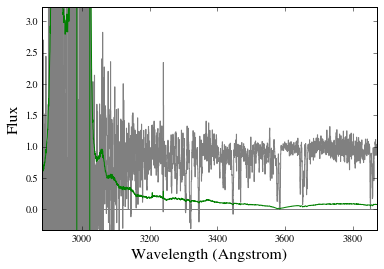

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using spec-6267-56279-0926.fits.gz for SDSSJ0143+2954
S/N in rest frame: 6.33441423372 1 / Angstrom


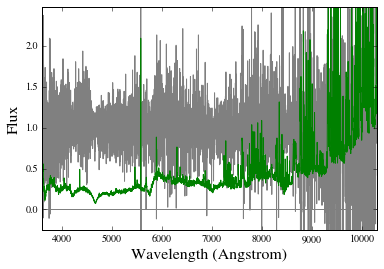

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ0233-0002 and wvobs=3630.56 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.00016 Gb
Loaded spectra
Staged 1 spectra totalling 0.00036 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/GMOS_redux//./SDSSJ034139.19-000012.7_b1200_F.fits.gz for SDSSJ0341-0000
S/N in rest frame: 81.2002163512 1 / Angstrom


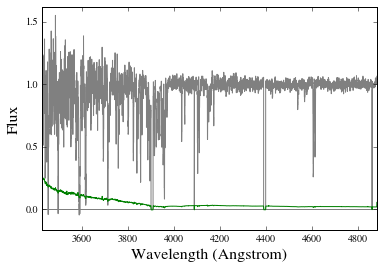

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ075008.27+272404.5_b1200_F.fits.gz for BOSSJ0750+2724
S/N in rest frame: 25.2943155744 1 / Angstrom


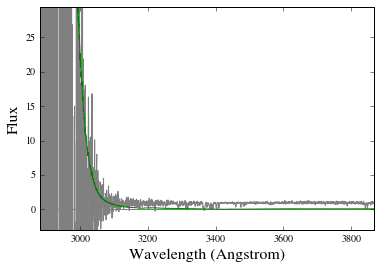

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 2.4e-05 Gb
Loaded spectra
No continuum: /u/xavier/Dropbox//QSOPairs/data/NIRI_redux//./SDSSJ080048.74+354231.3.fits
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ080048.74+354231.3_b1200_F.fits.gz for APOJ0800+3542
S/N in rest frame: 91.8284865936 1 / Angstrom


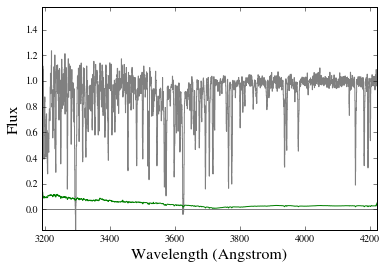

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using spec-7328-56715-0428.fits.gz for SDSSJ0809+4539
S/N in rest frame: 6.90702915001 1 / Angstrom


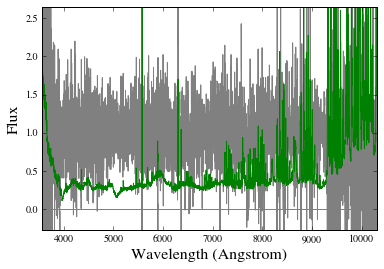

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.00016 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/GMOS_redux//./SDSSJ081420.38+325016.1_b1200_F.fits.gz for BOSSJ0814+3250
S/N in rest frame: 45.4033910613 1 / Angstrom


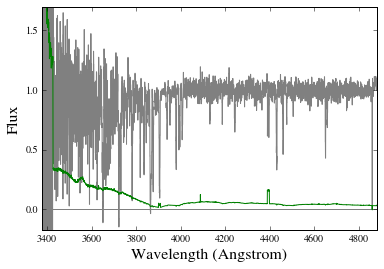

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ0823+5348 and wvobs=3775.67 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using spec-7301-56746-0872.fits.gz for SDSSJ0824+5313
S/N in rest frame: 16.479475949 1 / Angstrom


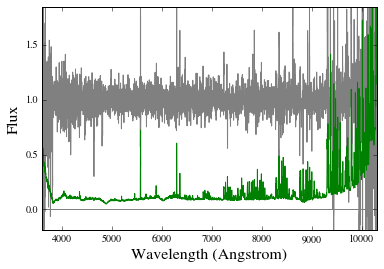

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ082844.87+454518.2_b1200_F.fits.gz for SDSSJ0828+4545
S/N in rest frame: 30.3853921563 1 / Angstrom


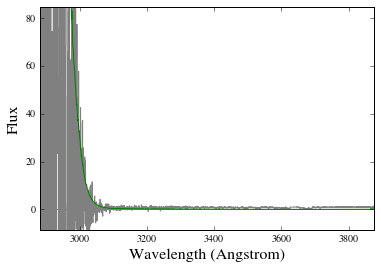

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ083757.13+383722.4_b1200_F.fits.gz for APOJ0837+3837
S/N in rest frame: 30.2325672808 1 / Angstrom


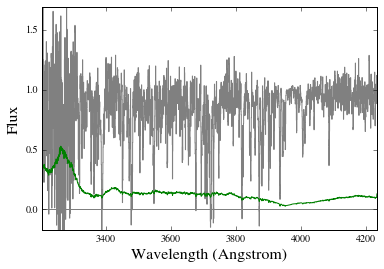

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 2.4e-05 Gb
Loaded spectra
No continuum: /u/xavier/Dropbox//QSOPairs/data/NIRI_redux//./SDSSJ084159.26+392140.0.fits
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ084159.26+392140.0_b1200_F.fits.gz for BOSSJ0841+3921
S/N in rest frame: 60.7802366381 1 / Angstrom


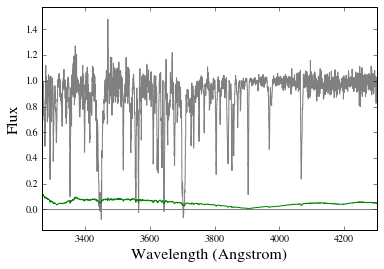

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using spec-7320-56722-0996.fits.gz for SDSSJ0850+4755
S/N in rest frame: 5.65269480077 1 / Angstrom


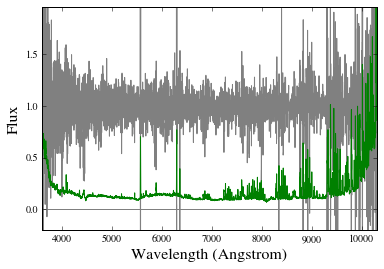

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ0851+5229 and wvobs=3968.63 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ0852+4714 and wvobs=3532.22 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.00036 Gb
Loaded spectra
Staged 1 spectra totalling 2.4e-05 Gb
Loaded spectra
No continuum: /u/xavier/Dropbox//QSOPairs/data/NIRSPEC_redux//./SDSSJ085357.49-001106.2.fits
Using /u/xavier/Dropbox//QSOPairs/data/MAGE_redux//./SDSSJ085357.49-001106.1_F.fits.gz for BOSSJ0853-0011
S/N in rest frame: 98.9152401339 1 / Angstrom


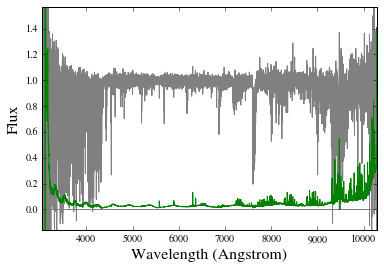

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No continuum: spec-7516-56782-0636.fits.gz
No spectrum found for SDSSJ0902+4654 and wvobs=3619.6 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
No spectrum found for SDSSJ0904+0042 and wvobs=3495.53 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
Staged 1 spectra totalling 0.00016 Gb
Loaded spectra
Staged 1 spectra totalling 0.00036 Gb
Loaded spectra
Staged 1 spectra totalling 0.0008 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/XSHOOTER_redux//./SDSSJ091338.97-010704.6_F.fits.gz for BOSSJ0913-0107
S/N in rest frame: 148.785541965 1 / Angstr

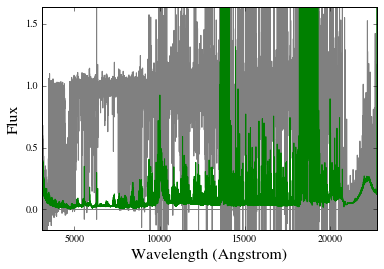

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/BOSS/v5_5_0/SDSSJ091553.38+011911.3.fits for SDSSJ0915+0119
S/N in rest frame: 10.8331445701 1 / Angstrom


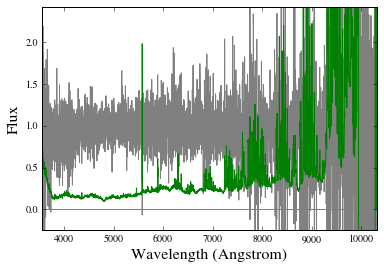

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using spec-7306-56684-0208.fits.gz for SDSSJ0924+4746
S/N in rest frame: 6.34357077849 1 / Angstrom


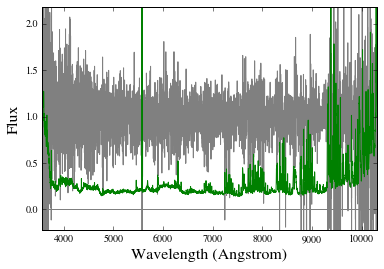

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ092416.73+392914.6_b1200_F.fits.gz for APOJ0924+3929
S/N in rest frame: 73.4837197801 1 / Angstrom


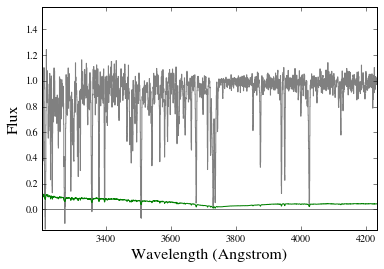

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/BOSS/v5_5_0/SDSSJ092544.71+372503.5.fits for BOSSJ0925+3725
S/N in rest frame: 6.1151490615 1 / Angstrom


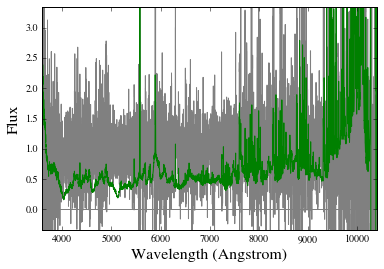

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ0929+4841 and wvobs=3648.95 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.00036 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/MAGE_redux//./SDSSJ093225.60+092500.2_F.fits.gz for APOJ0932+0925
S/N in rest frame: 63.0893467327 1 / Angstrom


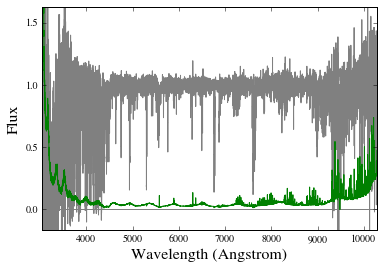

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
Using spec-5739-55976-0654.fits.gz for SDSSJ0951+4932
S/N in rest frame: 5.59238505632 1 / Angstrom


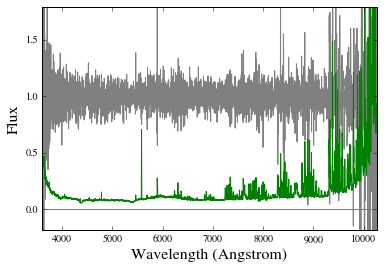

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ0955+5010 and wvobs=4045.23 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using spec-7282-56660-0352.fits.gz for SDSSJ0958+4913
S/N in rest frame: 15.1056940106 1 / Angstrom


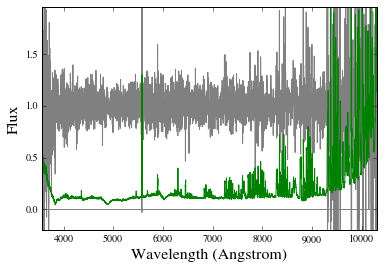

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ0959+4704 and wvobs=3783.05 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ100507.08+501929.8_b1200_F.fits.gz for SDSSJ1005+5019
S/N in rest frame: 61.1958688467 1 / Angstrom


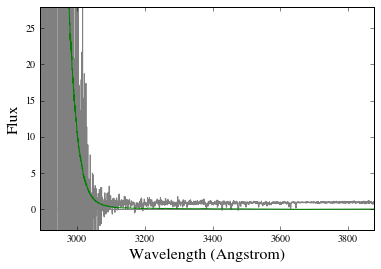

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ100940.58+250053.9_b1200_F.fits.gz for APOJ1009+2500
S/N in rest frame: 57.7116647736 1 / Angstrom


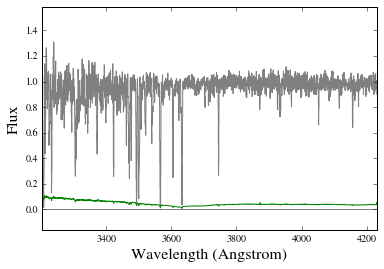

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ101947.00+494849.1_b1200_F.fits.gz for BOSSJ1019+4948
S/N in rest frame: 41.051245114 1 / Angstrom


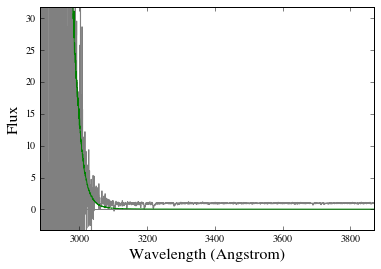

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using spec-6702-56381-0508.fits.gz for SDSSJ1036+5012
S/N in rest frame: 17.6500271638 1 / Angstrom


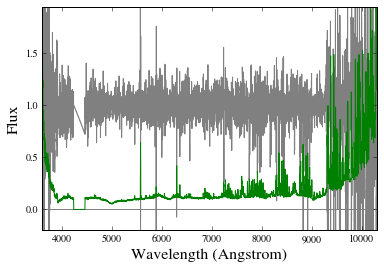

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.0007 Gb
Loaded spectra
Staged 1 spectra totalling 0.00016 Gb
Loaded spectra
Staged 2 spectra totalling 0.000168 Gb
Loaded spectra
No continuum: /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ103900.01+502652.8_r600_F.fits.gz
Using /u/xavier/Dropbox//QSOPairs/data/ESI_redux//./SDSSJ103900.01+502652.8_F.fits.gz for BOSSJ1039+5026
S/N in rest frame: 56.6214986074 1 / Angstrom


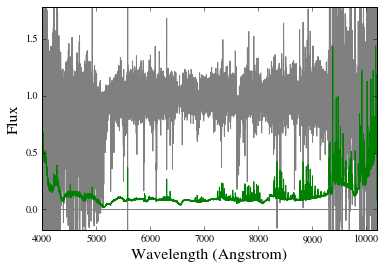

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using spec-7083-56722-0068.fits.gz for SDSSJ1042+6459
S/N in rest frame: 12.9992594248 1 / Angstrom


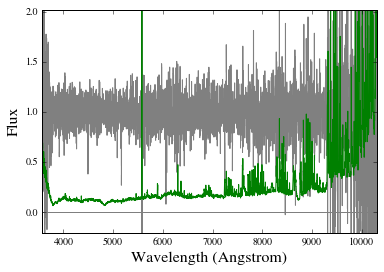

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No continuum: spec-7389-56769-0029.fits.gz
No spectrum found for SDSSJ1046+4706 and wvobs=3542.73 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ1111+4642 and wvobs=3897.43 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.0007 Gb
Loaded spectra
Staged 1 spectra totalling 0.00036 Gb
Loaded spectra
Staged 3 spectra totalling 0.00612 Gb
Loaded spectra
No continuum: /u/xavier/Dropbox//QSOPairs/data/MIKE_redux//./SDSSJ114436.65+095904.9_spl_F.fits.gz
Using /u/xavier/Dropbox//QSOPairs/data/MIKE_redux//./SDSSJ114436.65+095904.9_r_F.fits.gz for BOSSJ1144+

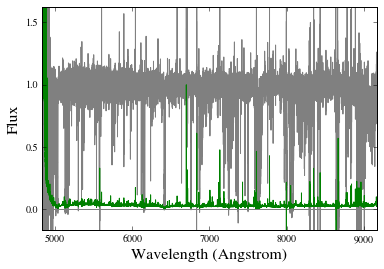

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No continuum: spec-7401-56808-0166.fits.gz
No spectrum found for SDSSJ1148+4507 and wvobs=3626.75 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.00016 Gb
Loaded spectra
Staged 1 spectra totalling 0.00144 Gb
Loaded spectra
Staged 1 spectra totalling 0.00036 Gb
Loaded spectra
No continuum: /u/xavier/Dropbox//QSOPairs/data/GMOS_redux//./SDSSJ120416.69+022111.0_b1200_F.fits.gz
No continuum: /u/xavier/Dropbox//QSOPairs/data/HIRES_redux//./SDSSJ120416.69+022111.0_f.fits.gz
Using conti=1 for HIRES
Using /u/xavier/Dropbox//QSOPairs/data/HIRES_redux//./SDSSJ120416.69+022111.0_f.fits.gz for BOSSJ1204+0221
S/N in rest frame: 142.737660247 1 / Angstrom


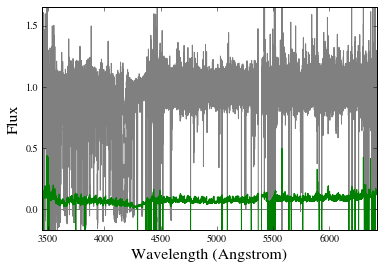

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 2.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
No continuum: /u/xavier/Dropbox//QSOPairs/data/NIRI_redux//./SDSSJ121558.82+571555.6.fits
Using /u/xavier/Dropbox//QSOPairs/data/SDSS//./SDSSJ121558.80+571555.4.fits.gz for BOSSJ1215+5715
S/N in rest frame: 15.4003819102 1 / Angstrom


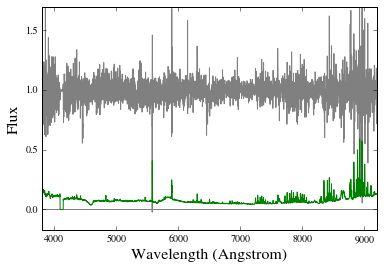

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No continuum: spec-7422-56799-0462.fits.gz
No spectrum found for SDSSJ1226+4538 and wvobs=3875.16 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No continuum: spec-7419-56811-0435.fits.gz
No spectrum found for SDSSJ1230+4703 and wvobs=3582.13 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
Staged 1 spectra totalling 0.00016 Gb
Loaded spectra
Staged 2 spectra totalling 0.000168 Gb
Loaded spectra
Staged 1 spectra totalling 0.0008 Gb
Loaded spectra
No continuum: /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ123141.73+002913.9_r600_F.fits.gz
Using 

/Users/lwymarie/anaconda/lib/python2.7/site-packages/astropy/units/quantity.py:974: RuntimeWarning: divide by zero encountered in true_divide
  return super(Quantity, self).__rtruediv__(other)


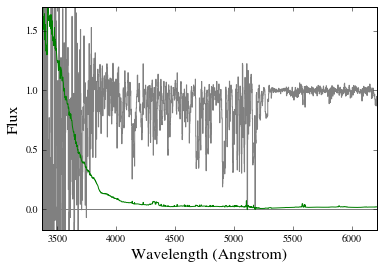

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No continuum: spec-7416-56810-0860.fits.gz
No spectrum found for SDSSJ1253+4751 and wvobs=3783.95 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ130603.55+615835.2_b1200_F.fits.gz for APOJ1306+6158
S/N in rest frame: 32.2260362938 1 / Angstrom


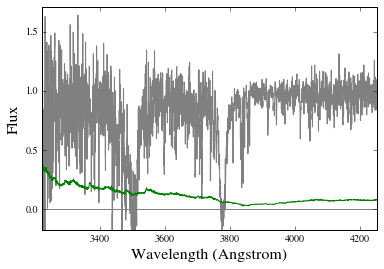

Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using spec-6622-56365-0168.fits.gz for SDSSJ1330+4114
S/N in rest frame: 19.8039004295 1 / Angstrom


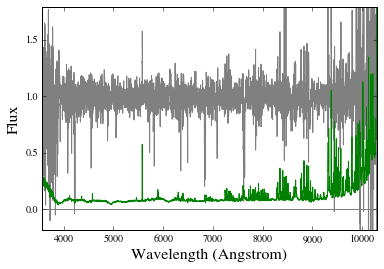

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ135849.55+273756.9_b1200_F.fits.gz for APOJ1358+2737
S/N in rest frame: 52.9957482164 1 / Angstrom


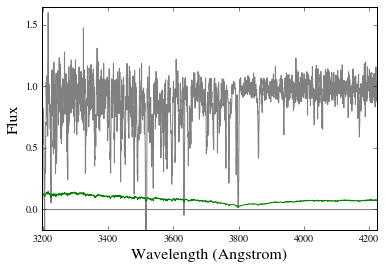

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/SDSS//./SDSSJ140916.98+522535.1.fits.gz for SDSSJ1409+5225
S/N in rest frame: 19.2201085639 1 / Angstrom


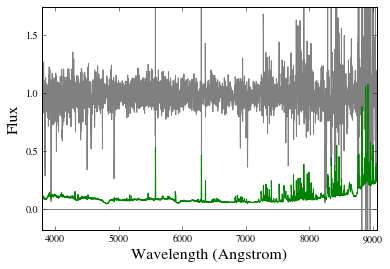

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 0.00036 Gb
Loaded spectra
Staged 1 spectra totalling 2.4e-05 Gb
Loaded spectra
No continuum: /u/xavier/Dropbox//QSOPairs/data/NIRI_redux//./SDSSJ142054.92+160342.9.fits
Using /u/xavier/Dropbox//QSOPairs/data/MAGE_redux//./SDSSJ142054.92+160342.9_F.fits.gz for APOJ1420+1603
S/N in rest frame: 43.9229497219 1 / Angstrom


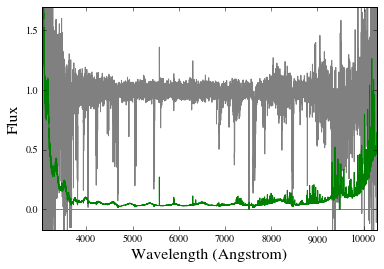

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.00016 Gb
Loaded spectra
Staged 1 spectra totalling 0.00036 Gb
Loaded spectra
Staged 3 spectra totalling 0.00612 Gb
Loaded spectra
No continuum: /u/xavier/Dropbox//QSOPairs/data/GMOS_redux//./SDSSJ142758.74-012136.2_b1200_F.fits.gz
No continuum: /u/xavier/Dropbox//QSOPairs/data/MIKE_redux//./SDSSJ142758.74-012136.2_r_F.fits.gz
No continuum: /u/xavier/Dropbox//QSOPairs/data/MIKE_redux//./SDSSJ142758.74-012136.2_spl_F.fits.gz
Using /u/xavier/Dropbox//QSOPairs/data/MIKE_redux//./SDSSJ142758.74-012136.2_b_F.fits.gz for BOSSJ1427-0121
S/N in rest frame: 138.590413393 1 / Angstrom


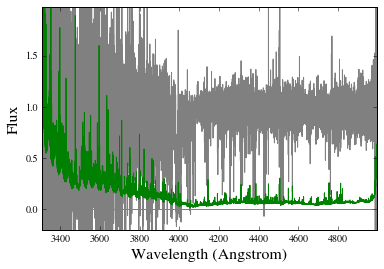

Database is QPQ
Created on 2017-Jan-31
Staged 3 spectra totalling 0.0003 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/BOSS/v5_7_0/SDSSJ143344.55+064111.9.fits for BOSSJ1433+0641
S/N in rest frame: 23.5414388907 1 / Angstrom


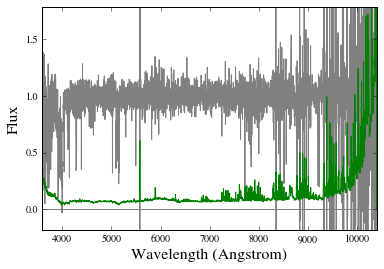

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ144427.97+311313.8_b1200_F.fits.gz for APOJ1444+3113
S/N in rest frame: 22.532115884 1 / Angstrom


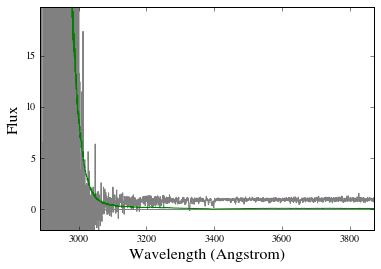

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 0.00036 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/MAGE_redux//./SDSSJ155325.89+192137.7_F.fits.gz for APOJ1553+1921
S/N in rest frame: 22.1545285855 1 / Angstrom


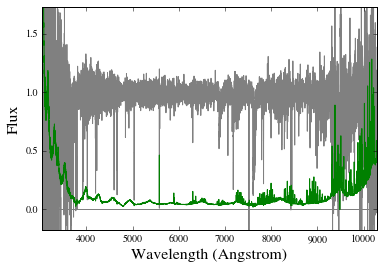

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ155946.28+494326.5_b1200_F.fits.gz for APOJ1559+4943
S/N in rest frame: 24.839736758 1 / Angstrom


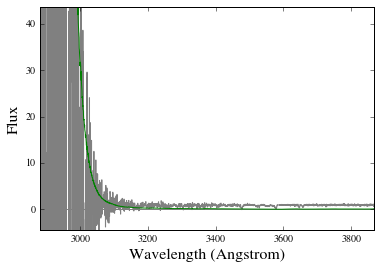

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ160546.67+511322.9_b1200_F.fits.gz for APOJ1605+5113
S/N in rest frame: 41.9828485416 1 / Angstrom


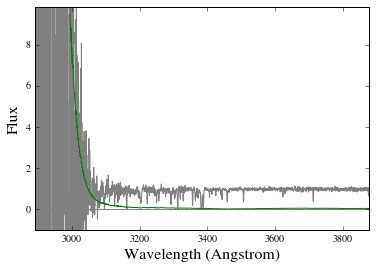

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.0007 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/ESI_redux//./SDSSJ162737.25+460609.3_F.fits.gz for APOJ1627+4606
S/N in rest frame: 121.115520708 1 / Angstrom


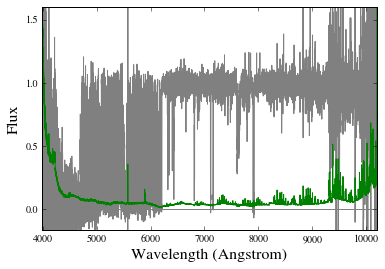

In [3]:
stack_tup0 = qpq9k.qpq9_IRMgII(passback=True,wrest=1334.5323*u.AA,S2N_cut=5.5/u.AA,zfg_mnx=(1.6,9999),
                               vsig_cut=400*u.km/u.s,plot_indiv=True)
# Mask
fin_velo, stck_img, stck_msk, all_dict = stack_tup0
stck_mskN = copy.deepcopy(stck_msk)
idx_mask = []
for ii,idict in enumerate(all_dict):
    if idict is None:
        continue
    if 'J1508+3635' in idict['qpq']['NAME']: #DLA not excluded by forest cut, should be excluded now
        idx_mask.append(ii)
for idx in idx_mask:
    stck_mskN[idx,:] = 0.

In [4]:
print(np.sum(stck_mskN,0))
sv_zfg = []
sv_Rperp = []
for ii,idict in enumerate(all_dict):
    if idict is None:
        continue
    if np.sum(stck_mskN[ii,:]) == 0:
        continue
    sv_zfg.append(idict['qpq']['Z_FG'])
    sv_Rperp.append(idict['qpq']['R_PHYS'])
    print(idict['qpq']['NAME'],idict['qpq']['Z_FG'])
np.median(sv_zfg),np.median(sv_Rperp)

[ 43.  43.  43.  43.  43.  43.  43.  43.  43.  43.  43.  43.  43.  43.  43.
  43.  43.  43.  43.  43.  43.  43.  43.  43.  43.  43.  43.  43.  43.  43.
  43.  43.  43.  43.  43.  43.  43.  43.  43.  43.  43.  43.  43.  43.  43.
  43.  43.  43.  43.  43.  43.  43.  43.  43.  43.  43.  43.  43.  43.  43.
  43.]
BOSSJ0034-1049 1.83877344864
SDSSJ0143+2954 1.80065387426
SDSSJ0341-0000 2.12461249631
BOSSJ0750+2724 1.77132745417
APOJ0800+3542 1.98252016132
SDSSJ0809+4539 2.03924689571
BOSSJ0814+3250 2.174411763
SDSSJ0824+5313 2.08550734352
SDSSJ0828+4545 1.87301486569
APOJ0837+3837 2.06242066408
BOSSJ0841+3921 2.04138910327
SDSSJ0850+4755 1.8164016608
BOSSJ0853-0011 2.40160837871
BOSSJ0913-0107 2.74911757097
SDSSJ0915+0119 1.97061514682
SDSSJ0924+4746 2.05559140701
APOJ0924+3929 1.88644053773
BOSSJ0925+3725 2.07038281331
APOJ0932+0925 2.41723499574
SDSSJ0951+4932 1.74074492723
SDSSJ0958+4913 2.05053901909
SDSSJ1005+5019 1.81761725726
APOJ1009+2500 1.87025304723
BOSSJ1019+4948 1.62241572355
S

(2.0220819873668177, 173.3450927734375)

## Stack and Plot

### Mean

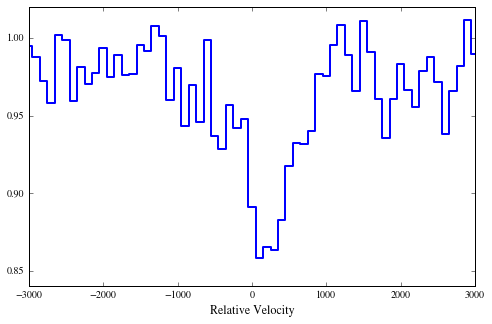

In [5]:
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()

### Median

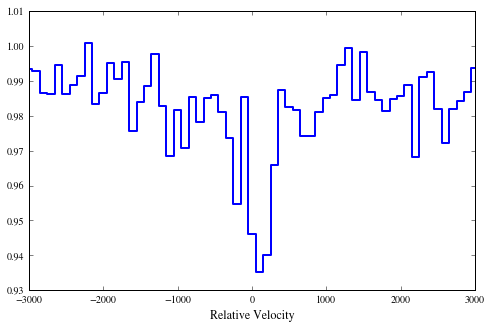

In [6]:
fin_velo, fin_flx_med, all_dict = qpqk.stack_med(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx_med, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()

### Write 

In [7]:
from linetools.spectra.xspectrum1d import XSpectrum1D
outfil = 'Output/QPQ9_zIRMgII_1334_mean.fits'
relativistic_equiv = u.doppler_relativistic(1334.5323*u.AA)
fin_wave = fin_velo.to(u.AA,equivalencies=relativistic_equiv)
xspec1d = XSpectrum1D.from_tuple((fin_wave, u.Quantity(fin_flx)))
xspec1d.write_to_fits(outfil,clobber=True)
outfil = 'Output/QPQ9_zIRMgII_1334_med.fits'
xspec1d = XSpectrum1D.from_tuple((fin_wave, u.Quantity(fin_flx_med)))
xspec1d.write_to_fits(outfil,clobber=True)

Wrote spectrum to Output/QPQ9_zIRMgII_1334_mean.fits
Wrote spectrum to Output/QPQ9_zIRMgII_1334_med.fits


## Bootstrap

In [8]:
#Mean 
reload(qpq9b)
qpq9b.boot_trans(wrest=1334.5323*u.AA,outfil='../Bootstrap/Output/IRMgII_1334_mean.fits',stack_tup0=stack_tup)

Equivalent width skewness: Mean=0.527427, Median=0.516966, std=0.256032 for Ntrials=10000
Centroid: Mean = 211.504, scatter=90.6882
Dispersion and scatter of it:  318.166778382 96.4667687335
max and min centroid:  686.370313404 -648.997155361
Wrote ../Bootstrap/Output/IRMgII_1334_mean.fits


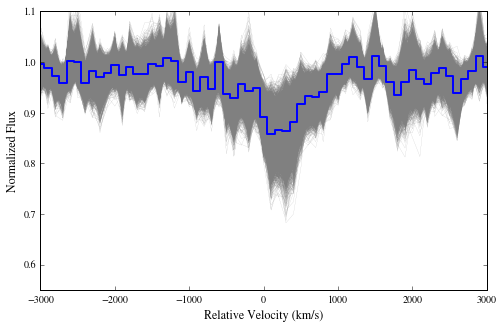

In [9]:
# plot trials
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
hdulist = fits.open('../Bootstrap/Output/IRMgII_1334_mean.fits')
boot_img = hdulist[1].data
for bb in np.arange(np.shape(boot_img)[0]):
    plt.plot(fin_velo,boot_img[bb,:],drawstyle='step-mid',linewidth=0.1,color='gray')
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.axis([-3000,3000,0.55,1.1])
plt.xlabel('Relative Velocity (km/s)', size=12.)
plt.ylabel('Normalized Flux', size=12.)
plt.show()

0.0248

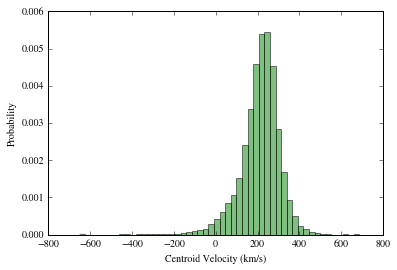

In [10]:
# Plot centroids
tau_cen = hdulist[3].data
n,bins,patches = plt.hist(tau_cen,50,normed=1,facecolor='green',alpha=0.5)
plt.xlabel('Centroid Velocity (km/s)')
plt.ylabel('Probability')
len(np.where(tau_cen < 0)[0])/len(tau_cen)

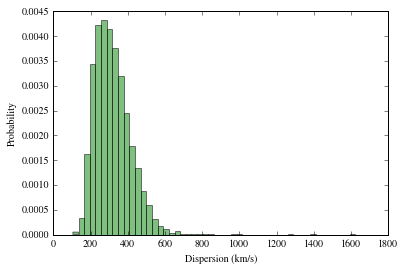

In [11]:
# Plot dispersions
tau_disp = hdulist[4].data
n,bins,patches = plt.hist(tau_disp,50,normed=1,facecolor='green',alpha=0.5)
plt.xlabel('Dispersion (km/s)')
plt.ylabel('Probability')

In [12]:
#Median
qpq9b.boot_trans(wrest=1334.5323*u.AA,outfil='../Bootstrap/Output/IRMgII_1334_med.fits',stack_tup0=stack_tup,median=True)

Equivalent width skewness: Mean=0.276794, Median=0.269884, std=0.327294 for Ntrials=10000
Centroid: Mean = 83.3313, scatter=154.078
Dispersion and scatter of it:  283.686472128 413.124961106
max and min centroid:  2891.21016284 -1046.60773465
Wrote ../Bootstrap/Output/IRMgII_1334_med.fits


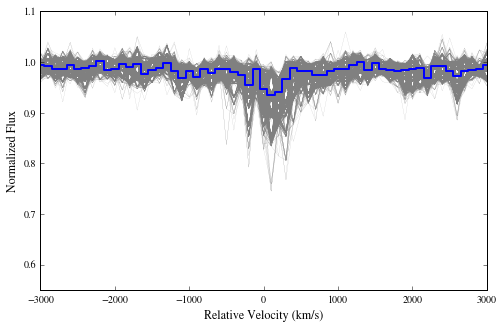

In [13]:
# plot trials
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_med(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
hdulist = fits.open('../Bootstrap/Output/IRMgII_1334_med.fits')
boot_img = hdulist[1].data
for bb in np.arange(np.shape(boot_img)[0]):
    plt.plot(fin_velo,boot_img[bb,:],drawstyle='step-mid',linewidth=0.1,color='gray')
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.axis([-3000,3000,0.55,1.1])
plt.xlabel('Relative Velocity (km/s)', size=12.)
plt.ylabel('Normalized Flux', size=12.)
plt.show()

# [OIII] only

In [14]:
stack_tup0 = qpq9k.qpq9_IRMgII(passback=True,wrest=1334.5323*u.AA,vsig_cut=70*u.km/u.s,S2N_cut=5.5/u.AA,zfg_mnx=(1.6,9999),
                              plot_indiv=False)
# Mask
fin_velo, stck_img, stck_msk, all_dict = stack_tup0
stck_mskN = copy.deepcopy(stck_msk)
idx_mask = []
for ii,dd in enumerate(all_dict):
    if dd is None:
        continue
    if 'J1508+3635' in dd['qpq']['NAME']: #DLA not excluded by forest cut, should be excluded now
        idx_mask.append(ii) 
for idx in idx_mask:
    stck_mskN[idx,:] = 0.

Reading /Users/lwymarie/python/enigma/enigma/data/qpq/qpq9_final.fits
Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 2.4e-05 Gb
Loaded spectra
No continuum: /u/xavier/Dropbox//QSOPairs/data/NIRI_redux//./SDSSJ080048.74+354231.3.fits
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ080048.74+354231.3_b1200_F.fits.gz for APOJ0800+3542
S/N in rest frame: 91.8284865936 1 / Angstrom
Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.00016 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/GMOS_redux//./SDSSJ081420.38+325016.1_b1200_F.fits.gz for BOSSJ0814+3250
S/N in rest frame: 45.4033910613 1 / Angstrom
Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 2.4e-05 Gb
Loaded spectra
No continuum: /u/xavier/Dropbox//QSOPairs/data/NIRI_redux//./SDSSJ084159.26+392140.0.fits
U

In [15]:
print(np.sum(stck_mskN,0))
sv_zfg = []
sv_Rperp = []
for ii,idict in enumerate(all_dict):
    if idict is None:
        continue
    if np.sum(stck_mskN[ii,:]) == 0:
        continue
    print(idict['qpq']['NAME'])
    sv_zfg.append(idict['qpq']['Z_FG'])
    sv_Rperp.append(idict['qpq']['R_PHYS'])
np.median(sv_zfg),np.median(sv_Rperp)

[ 15.  15.  15.  15.  15.  15.  15.  15.  15.  15.  15.  15.  15.  15.  15.
  15.  15.  15.  15.  15.  15.  15.  15.  15.  15.  15.  15.  15.  15.  15.
  15.  15.  15.  15.  15.  15.  15.  15.  15.  15.  15.  15.  15.  15.  15.
  15.  15.  15.  15.  15.  15.  15.  15.  15.  15.  15.  15.  15.  15.  15.
  15.]
APOJ0800+3542
BOSSJ0814+3250
BOSSJ0841+3921
BOSSJ0853-0011
APOJ0932+0925
BOSSJ1039+5026
BOSSJ1144+0959
BOSSJ1204+0221
BOSSJ1215+5715
BOSSJ1231+0029
APOJ1420+1603
BOSSJ1427-0121
BOSSJ1433+0641
APOJ1553+1921
APOJ1627+4606


(2.2939547136906882, 182.69367526263065)

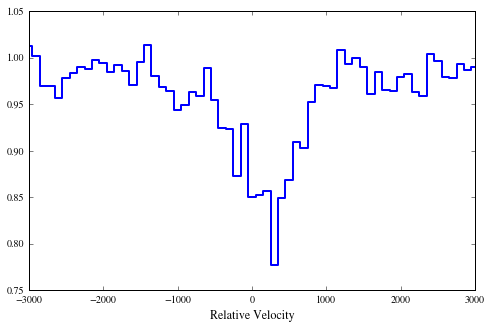

In [16]:
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()

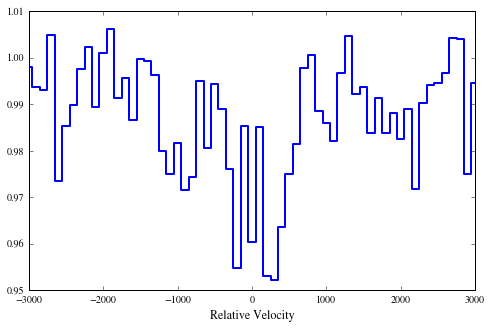

In [17]:
fin_velo, fin_flx_med, all_dict = qpqk.stack_med(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx_med, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()

### Write

In [18]:
from linetools.spectra.xspectrum1d import XSpectrum1D
outfil = 'Output/QPQ9_zOIII_1334_mean.fits'
relativistic_equiv = u.doppler_relativistic(1334.5323*u.AA)
fin_wave = fin_velo.to(u.AA,equivalencies=relativistic_equiv)
xspec1d = XSpectrum1D.from_tuple((fin_wave, u.Quantity(fin_flx)))
xspec1d.write_to_fits(outfil,clobber=True)
outfil = 'Output/QPQ9_zOIII_1334_med.fits'
xspec1d = XSpectrum1D.from_tuple((fin_wave, u.Quantity(fin_flx_med)))
xspec1d.write_to_fits(outfil,clobber=True)

Wrote spectrum to Output/QPQ9_zOIII_1334_mean.fits
Wrote spectrum to Output/QPQ9_zOIII_1334_med.fits


## Bootstrap

In [8]:
#Mean 
reload(qpq9b)
qpq9b.boot_trans(wrest=1334.5323*u.AA,outfil='../Bootstrap/Output/OIII_1334_mean.fits',stack_tup0=stack_tup)

Equivalent width skewness: Mean=0.370133, Median=0.391122, std=0.233466 for Ntrials=10000
Centroid: Mean = 209.949, scatter=134.811
Dispersion and scatter of it:  344.431761966 163.797253592
max and min centroid:  658.585979803 -551.15263732
Wrote ../Bootstrap/Output/OIII_1334_mean.fits


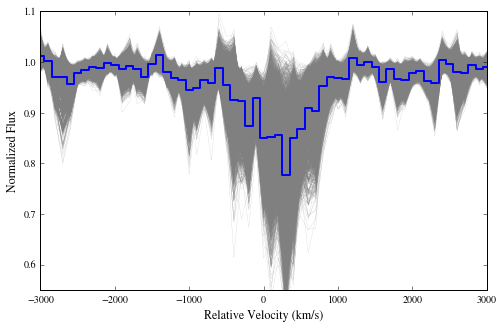

In [9]:
# plot trials
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
hdulist = fits.open('../Bootstrap/Output/OIII_1334_mean.fits')
boot_img = hdulist[1].data
for bb in np.arange(np.shape(boot_img)[0]):
    plt.plot(fin_velo,boot_img[bb,:],drawstyle='step-mid',linewidth=0.1,color='gray')
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.axis([-3000,3000,0.55,1.1])
plt.xlabel('Relative Velocity (km/s)', size=12.)
plt.ylabel('Normalized Flux', size=12.)
plt.show()

0.0639

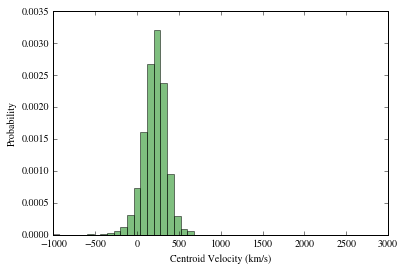

In [10]:
# Plot centroids
tau_cen = hdulist[3].data
n, bins, patches = plt.hist(tau_cen, 50, normed=1, facecolor='green', alpha=0.5,range=(-1000,3000))
plt.xlabel('Centroid Velocity (km/s)')
plt.ylabel('Probability')
len(np.where(tau_cen < 0)[0])/len(tau_cen)

In [25]:
#Median
qpq9b.boot_trans(wrest=1334.5323*u.AA,outfil='../Bootstrap/Output/OIII_1334_med.fits',stack_tup0=stack_tup,median=True,nboot=1000)

Equivalent width skewness: Mean=0.187115, Median=0.245305, std=0.44803 for Ntrials=1000
Centroid: Mean = 144.258, scatter=262.636
Dispersion and scatter of it:  419.442207759 1013.20536447
max and min centroid:  3046.1900641 -627.195875157
Wrote ../Bootstrap/Output/OIII_1334_med.fits


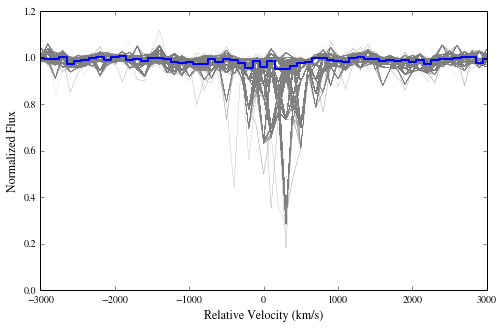

In [12]:
# plot 
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_med(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
hdulist = fits.open('../Bootstrap/Output/OIII_1334_med.fits')
boot_img = hdulist[1].data
for bb in np.arange(np.shape(boot_img)[0]):
    plt.plot(fin_velo,boot_img[bb,:],drawstyle='step-mid',linewidth=0.1,color='gray')
plt.plot(fin_velo, fin_flx_med, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity (km/s)', size=12.)
plt.ylabel('Normalized Flux', size=12.)
plt.show()

# Plot individual spectra 

Reading /Users/lwymarie/python/enigma/enigma/data/qpq/qpq9_final.fits
Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ003423.40-104956.3_b1200_F.fits.gz for BOSSJ0034-1049
S/N in rest frame: 27.395062906 1 / Angstrom
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using spec-6267-56279-0926.fits.gz for SDSSJ0143+2954
S/N in rest frame: 6.33441423372 1 / Angstrom
Database is QPQ
Created on 2017-Jan-31
Loading igmspec from /Users/lwymarie/Documents/Databases/IGMspec_DB_v02.1.hdf5
Database is igmspec
Created on 2017-Sep-18
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
No spectrum found for SDSSJ0233-0002 and wvobs=3630.56 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.00016 Gb
Loaded spec

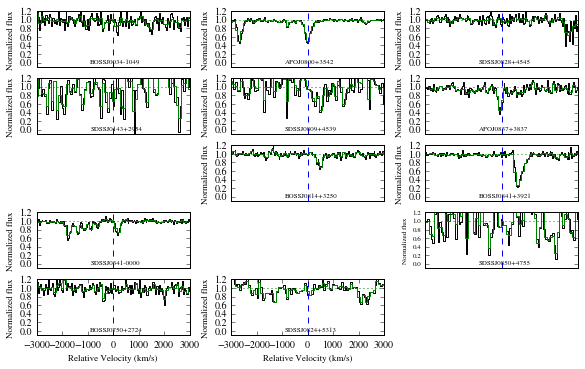

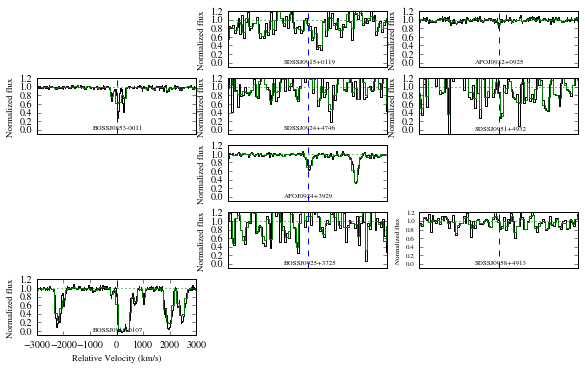

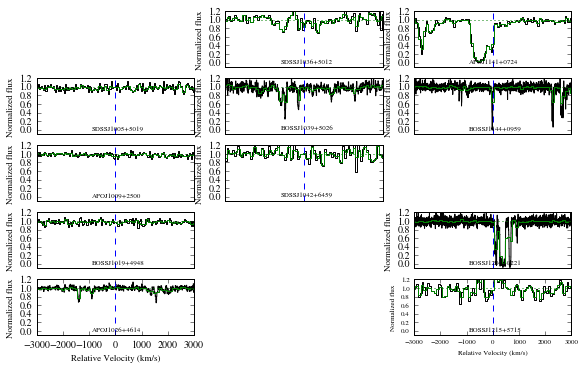

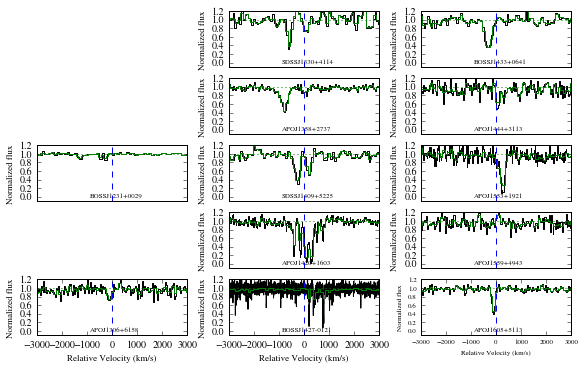

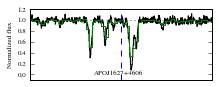

In [18]:
qpq9k.plt_qpq9(wrest=1334.5323*u.AA,S2N_cut=5.5/u.AA,stack_fg=False,zfg_mnx=(1.6,9999))

# Split in two bins of g_UV

## MgII redshift stack

x.fits.bintab_to_table: Reading /Users/lwymarie/python/enigma/enigma/data/qpq/qpq9_final.fits
Reading /Users/lwymarie/python/enigma/enigma/data/qpq/qpq9_final.fits
Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.00016 Gb
Loaded spectra
Staged 1 spectra totalling 0.00036 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/GMOS_redux//./SDSSJ034139.19-000012.7_b1200_F.fits.gz for SDSSJ0341-0000
S/N in rest frame: 81.2002163512 1 / Angstrom


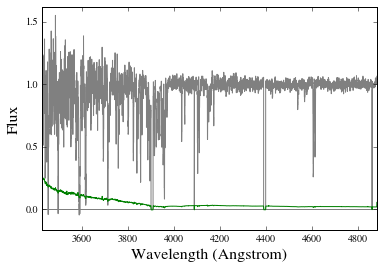

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 2.4e-05 Gb
Loaded spectra
No continuum: /u/xavier/Dropbox//QSOPairs/data/NIRI_redux//./SDSSJ080048.74+354231.3.fits
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ080048.74+354231.3_b1200_F.fits.gz for APOJ0800+3542
S/N in rest frame: 91.8284865936 1 / Angstrom


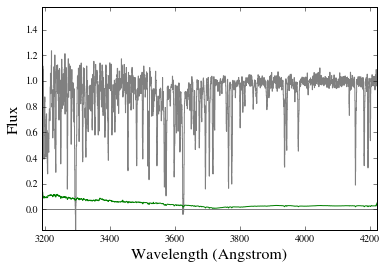

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.00016 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/GMOS_redux//./SDSSJ081420.38+325016.1_b1200_F.fits.gz for BOSSJ0814+3250
S/N in rest frame: 45.4033910613 1 / Angstrom


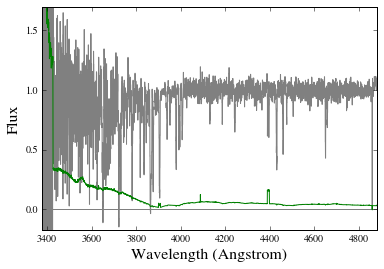

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ082844.87+454518.2_b1200_F.fits.gz for SDSSJ0828+4545
S/N in rest frame: 30.3853921563 1 / Angstrom


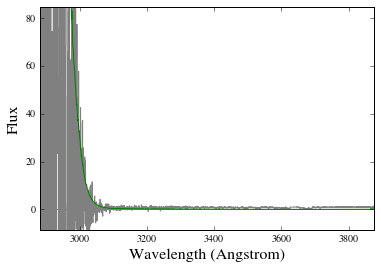

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ083757.13+383722.4_b1200_F.fits.gz for APOJ0837+3837
S/N in rest frame: 30.2325672808 1 / Angstrom


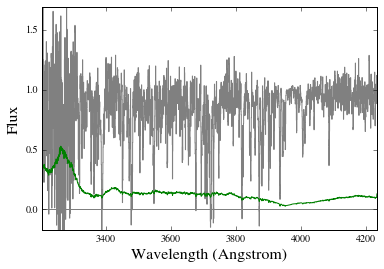

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 2.4e-05 Gb
Loaded spectra
No continuum: /u/xavier/Dropbox//QSOPairs/data/NIRI_redux//./SDSSJ084159.26+392140.0.fits
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ084159.26+392140.0_b1200_F.fits.gz for BOSSJ0841+3921
S/N in rest frame: 60.7802366381 1 / Angstrom


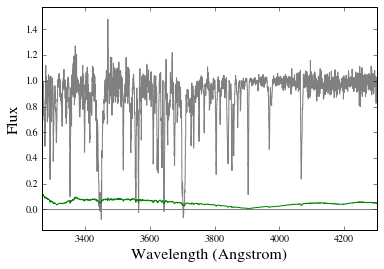

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.00036 Gb
Loaded spectra
Staged 1 spectra totalling 2.4e-05 Gb
Loaded spectra
No continuum: /u/xavier/Dropbox//QSOPairs/data/NIRSPEC_redux//./SDSSJ085357.49-001106.2.fits
Using /u/xavier/Dropbox//QSOPairs/data/MAGE_redux//./SDSSJ085357.49-001106.1_F.fits.gz for BOSSJ0853-0011
S/N in rest frame: 98.9152401339 1 / Angstrom


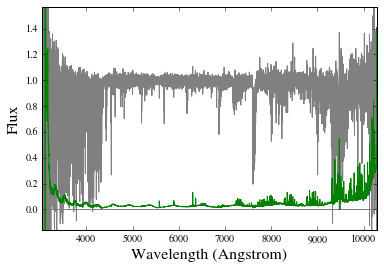

Database is QPQ
Created on 2017-Jan-31
Database is igmspec
Created on 2016-Dec-13
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
No spectrum found for BOSSJ0904+0042 and wvobs=3495.53 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
Staged 1 spectra totalling 0.00016 Gb
Loaded spectra
Staged 1 spectra totalling 0.00036 Gb
Loaded spectra
Staged 1 spectra totalling 0.0008 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/XSHOOTER_redux//./SDSSJ091338.97-010704.6_F.fits.gz for BOSSJ0913-0107
S/N in rest frame: 148.785541965 1 / Angstrom


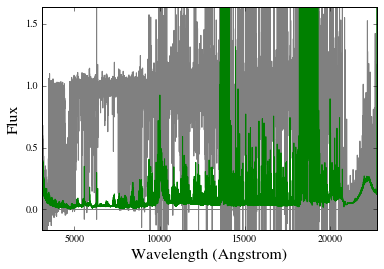

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/BOSS/v5_5_0/SDSSJ091553.38+011911.3.fits for BOSSJ0915+0119
S/N in rest frame: 10.8331445701 1 / Angstrom


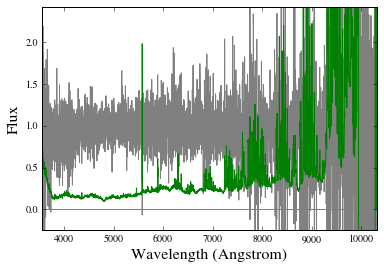

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ092416.73+392914.6_b1200_F.fits.gz for APOJ0924+3929
S/N in rest frame: 73.4837197801 1 / Angstrom


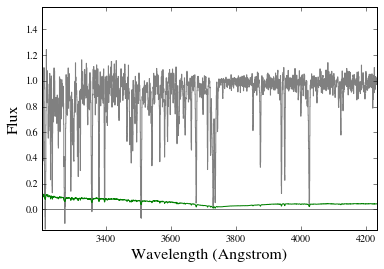

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.00036 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/MAGE_redux//./SDSSJ093225.60+092500.2_F.fits.gz for APOJ0932+0925
S/N in rest frame: 63.0893467327 1 / Angstrom


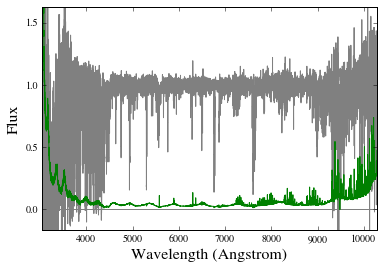

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
No spectrum found for BOSSJ1002+0020 and wvobs=4241.08 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ100507.08+501929.8_b1200_F.fits.gz for SDSSJ1005+5019
S/N in rest frame: 61.1958688467 1 / Angstrom


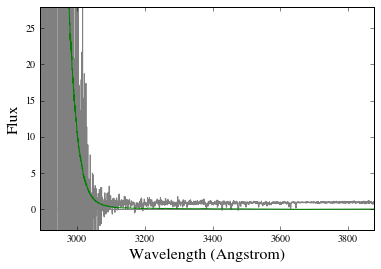

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ100940.58+250053.9_b1200_F.fits.gz for APOJ1009+2500
S/N in rest frame: 57.7116647736 1 / Angstrom


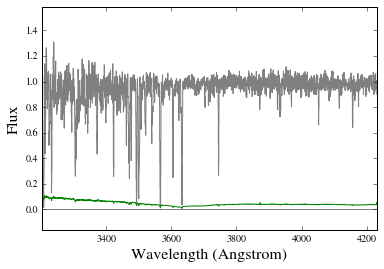

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.0007 Gb
Loaded spectra
Staged 2 spectra totalling 0.000168 Gb
Loaded spectra
No continuum: /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ102616.12+461420.8_r600_F.fits.gz
Using /u/xavier/Dropbox//QSOPairs/data/ESI_redux//./SDSSJ102616.12+461420.8_F.fits.gz for APOJ1026+4614
S/N in rest frame: 108.460526863 1 / Angstrom


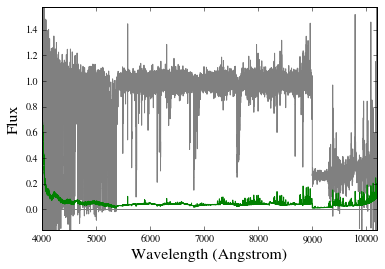

Database is QPQ
Created on 2017-Jan-31
Database is igmspec
Created on 2016-Dec-13
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using spec-6702-56381-0508.fits.gz for BOSSJ1036+5012
S/N in rest frame: 17.6500271638 1 / Angstrom


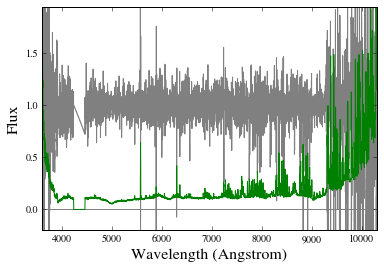

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.0007 Gb
Loaded spectra
Staged 1 spectra totalling 0.00016 Gb
Loaded spectra
Staged 2 spectra totalling 0.000168 Gb
Loaded spectra
No continuum: /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ103900.01+502652.8_r600_F.fits.gz
Using /u/xavier/Dropbox//QSOPairs/data/ESI_redux//./SDSSJ103900.01+502652.8_F.fits.gz for BOSSJ1039+5026
S/N in rest frame: 56.6214986074 1 / Angstrom


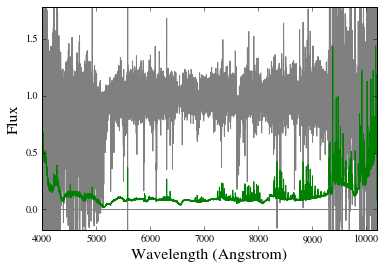

Database is QPQ
Created on 2017-Jan-31
Database is igmspec
Created on 2016-Dec-13
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using spec-7083-56722-0068.fits.gz for BOSSJ1042+6459
S/N in rest frame: 12.9992594248 1 / Angstrom


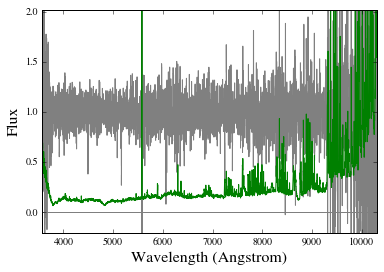

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.00016 Gb
Loaded spectra
Staged 2 spectra totalling 0.000168 Gb
Loaded spectra
Staged 1 spectra totalling 0.0008 Gb
Loaded spectra
No continuum: /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ114145.43+072423.3_b400_F.fits.gz
No continuum: /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ114145.43+072423.3_r600_F.fits.gz
Using /u/xavier/Dropbox//QSOPairs/data/GMOS_redux//./SDSSJ114145.43+072423.3_b600_F.fits.gz for APOJ1141+0724
S/N in rest frame: 51.903728653 1 / Angstrom


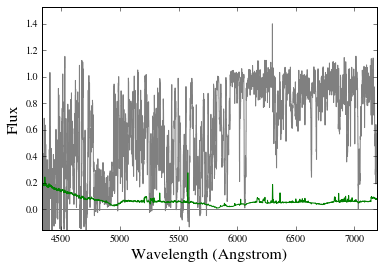

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.0007 Gb
Loaded spectra
Staged 1 spectra totalling 0.00036 Gb
Loaded spectra
Staged 3 spectra totalling 0.00612 Gb
Loaded spectra
No continuum: /u/xavier/Dropbox//QSOPairs/data/MIKE_redux//./SDSSJ114436.65+095904.9_spl_F.fits.gz
Using /u/xavier/Dropbox//QSOPairs/data/MIKE_redux//./SDSSJ114436.65+095904.9_r_F.fits.gz for BOSSJ1144+0959
S/N in rest frame: 182.960972292 1 / Angstrom


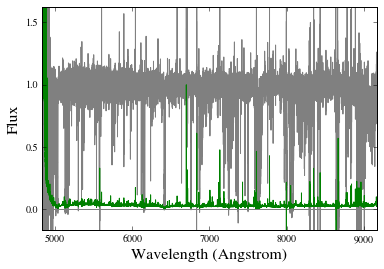

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.00016 Gb
Loaded spectra
Staged 1 spectra totalling 0.00144 Gb
Loaded spectra
Staged 1 spectra totalling 0.00036 Gb
Loaded spectra
No continuum: /u/xavier/Dropbox//QSOPairs/data/GMOS_redux//./SDSSJ120416.69+022111.0_b1200_F.fits.gz
No continuum: /u/xavier/Dropbox//QSOPairs/data/HIRES_redux//./SDSSJ120416.69+022111.0_f.fits.gz
Using conti=1 for HIRES
Using /u/xavier/Dropbox//QSOPairs/data/HIRES_redux//./SDSSJ120416.69+022111.0_f.fits.gz for BOSSJ1204+0221
S/N in rest frame: 142.737660247 1 / Angstrom


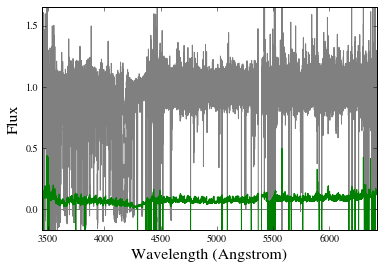

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 2.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
No continuum: /u/xavier/Dropbox//QSOPairs/data/NIRI_redux//./SDSSJ121558.82+571555.6.fits
Using /u/xavier/Dropbox//QSOPairs/data/SDSS//./SDSSJ121558.80+571555.4.fits.gz for BOSSJ1215+5715
S/N in rest frame: 15.4003819102 1 / Angstrom


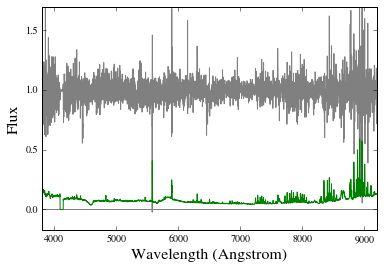

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
Staged 1 spectra totalling 0.00016 Gb
Loaded spectra
Staged 2 spectra totalling 0.000168 Gb
Loaded spectra
Staged 1 spectra totalling 0.0008 Gb
Loaded spectra
No continuum: /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ123141.73+002913.9_r600_F.fits.gz
Using /u/xavier/Dropbox//QSOPairs/data/GMOS_redux//./SDSSJ123141.73+002913.9_b600_F.fits.gz for BOSSJ1231+0029
S/N in rest frame: 78.1900954682 1 / Angstrom


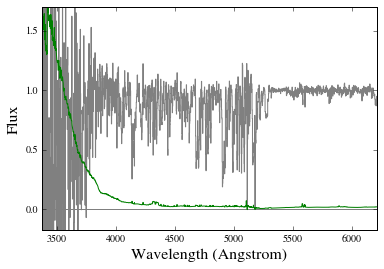

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ130603.55+615835.2_b1200_F.fits.gz for APOJ1306+6158
S/N in rest frame: 32.2260362938 1 / Angstrom


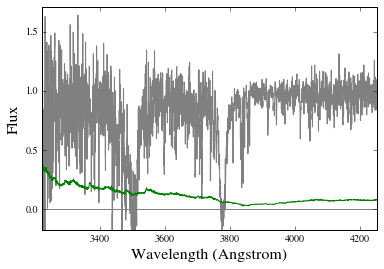

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ135849.55+273756.9_b1200_F.fits.gz for APOJ1358+2737
S/N in rest frame: 52.9957482164 1 / Angstrom


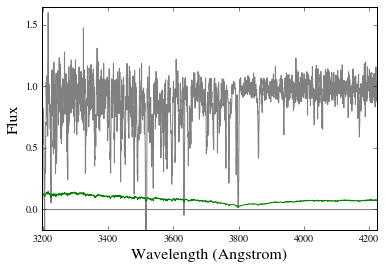

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 0.00036 Gb
Loaded spectra
Staged 1 spectra totalling 2.4e-05 Gb
Loaded spectra
No continuum: /u/xavier/Dropbox//QSOPairs/data/NIRI_redux//./SDSSJ142054.92+160342.9.fits
Using /u/xavier/Dropbox//QSOPairs/data/MAGE_redux//./SDSSJ142054.92+160342.9_F.fits.gz for APOJ1420+1603
S/N in rest frame: 43.9229497219 1 / Angstrom


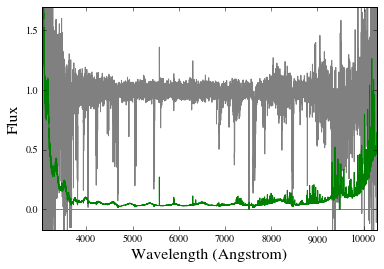

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.00016 Gb
Loaded spectra
Staged 1 spectra totalling 0.00036 Gb
Loaded spectra
Staged 3 spectra totalling 0.00612 Gb
Loaded spectra
No continuum: /u/xavier/Dropbox//QSOPairs/data/GMOS_redux//./SDSSJ142758.74-012136.2_b1200_F.fits.gz
No continuum: /u/xavier/Dropbox//QSOPairs/data/MIKE_redux//./SDSSJ142758.74-012136.2_r_F.fits.gz
No continuum: /u/xavier/Dropbox//QSOPairs/data/MIKE_redux//./SDSSJ142758.74-012136.2_spl_F.fits.gz
Using /u/xavier/Dropbox//QSOPairs/data/MIKE_redux//./SDSSJ142758.74-012136.2_b_F.fits.gz for BOSSJ1427-0121
S/N in rest frame: 138.590413393 1 / Angstrom


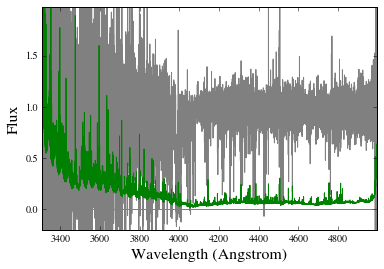

Database is QPQ
Created on 2017-Jan-31
Staged 3 spectra totalling 0.0003 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/BOSS/v5_7_0/SDSSJ143344.55+064111.9.fits for BOSSJ1433+0641
S/N in rest frame: 23.5414388907 1 / Angstrom


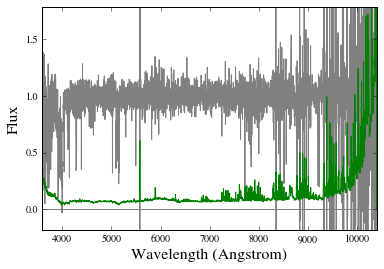

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 0.00036 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/MAGE_redux//./SDSSJ155325.89+192137.7_F.fits.gz for APOJ1553+1921
S/N in rest frame: 22.1545285855 1 / Angstrom


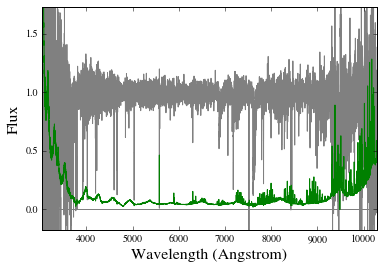

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ155946.28+494326.5_b1200_F.fits.gz for APOJ1559+4943
S/N in rest frame: 24.839736758 1 / Angstrom


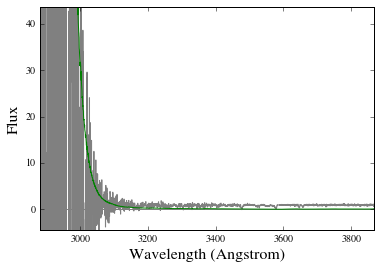

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ160546.67+511322.9_b1200_F.fits.gz for BOSSJ1605+5113
S/N in rest frame: 41.9828485416 1 / Angstrom


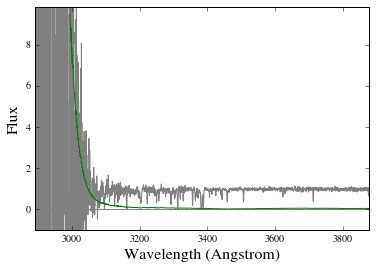

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.0007 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/ESI_redux//./SDSSJ162737.25+460609.3_F.fits.gz for APOJ1627+4606
S/N in rest frame: 121.115520708 1 / Angstrom


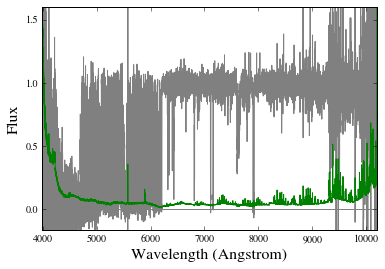

In [25]:
# Load QPQ9 data structure
enigma_path = imp.find_module('enigma')[1]
QPQ9 = xxf.bintab_to_table(enigma_path+'/data/qpq/qpq9_final.fits')
c_QPQ9 = SkyCoord(QPQ9['FG_RA']*u.deg,QPQ9['FG_DEC']*u.deg)
# Find median g_UV
stack_tup0 = qpq9k.qpq9_IRMgII(passback=True,wrest=1334.5323*u.AA,S2N_cut=5.5/u.AA,zfg_mnx=(1.6,9999))
fin_velo, stck_img, stck_msk, all_dict = stack_tup0
sv_gUV = []
for idict in all_dict:
    if idict == None:
        continue
    c_stacked = SkyCoord(idict['qpq']['FG_RA']*u.deg,idict['qpq']['FG_DEC']*u.deg)
    sv_gUV.append(QPQ9[np.where(c_stacked.separation(c_QPQ9) < 0.5*u.arcsec)[0]]['G_UV'][0])
med_gUV = np.median(sv_gUV)

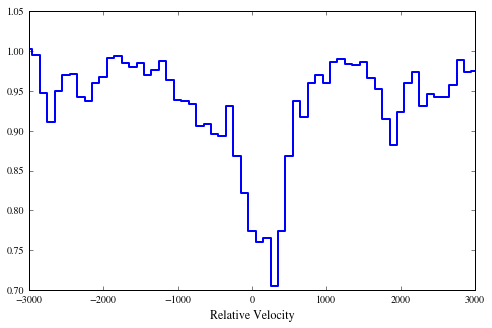

In [26]:
# Mask spectra of gUV below median 
stck_mskN = copy.deepcopy(stck_msk)
idx_mask = []
for ii,idict in enumerate(all_dict):
    if idict is None:
        continue
    if 'J1508+3635' in idict['qpq']['NAME']: #DLA not excluded by forest cut, should be excluded now
        idx_mask.append(ii) 
    c_stacked = SkyCoord(idict['qpq']['FG_RA']*u.deg,idict['qpq']['FG_DEC']*u.deg)
    gUV = QPQ9[np.where(c_stacked.separation(c_QPQ9) < 0.5*u.arcsec)[0]]['G_UV'][0]
    if gUV <= med_gUV:
        idx_mask.append(ii)
for idx in idx_mask:
    stck_mskN[idx,:] = 0.
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()

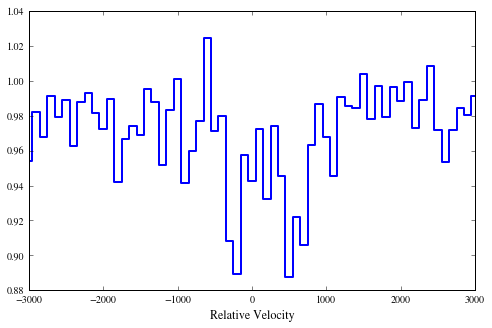

In [27]:
# Mask spectra of gUV above median 
stck_mskN = copy.deepcopy(stck_msk)
idx_mask = []
for ii,idict in enumerate(all_dict):
    if idict is None:
        continue
    if 'J1508+3635' in idict['qpq']['NAME']: #DLA not excluded by forest cut, should be excluded now
        idx_mask.append(ii) 
    c_stacked = SkyCoord(idict['qpq']['FG_RA']*u.deg,idict['qpq']['FG_DEC']*u.deg)
    gUV = QPQ9[np.where(c_stacked.separation(c_QPQ9) < 0.5*u.arcsec)[0]]['G_UV'][0]
    if gUV >= med_gUV:
        idx_mask.append(ii)
for idx in idx_mask:
    stck_mskN[idx,:] = 0.
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()

## [OIII] redshift stack

In [28]:
# Find median g_UV
stack_tup0 = qpq9k.qpq9_IRMgII(passback=True,wrest=1334.5323*u.AA,vsig_cut=50*u.km/u.s,S2N_cut=5.5/u.AA,zfg_mnx=(1.6,9999))
fin_velo, stck_img, stck_msk, all_dict = stack_tup0
sv_gUV = []
for idict in all_dict:
    if idict == None:
        continue
    c_stacked = SkyCoord(idict['qpq']['FG_RA']*u.deg,idict['qpq']['FG_DEC']*u.deg)
    sv_gUV.append(QPQ9[np.where(c_stacked.separation(c_QPQ9) < 0.5*u.arcsec)[0]]['G_UV'][0])
med_gUV = np.median(sv_gUV)

Reading /Users/lwymarie/python/enigma/enigma/data/qpq/qpq9_final.fits


/Users/lwymarie/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/lwymarie/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


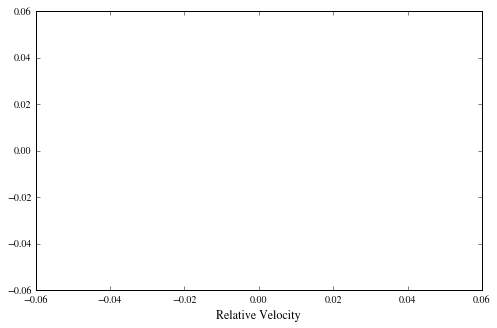

In [29]:
# Mask spectra of gUV below median 
stck_mskN = copy.deepcopy(stck_msk)
idx_mask = []
for ii,idict in enumerate(all_dict):
    if idict is None:
        continue
    if 'J1508+3635' in idict['qpq']['NAME']: #DLA not excluded by forest cut, should be excluded now
        idx_mask.append(ii) 
    c_stacked = SkyCoord(idict['qpq']['FG_RA']*u.deg,idict['qpq']['FG_DEC']*u.deg)
    gUV = QPQ9[np.where(c_stacked.separation(c_QPQ9) < 0.5*u.arcsec)[0]]['G_UV'][0]
    if gUV <= med_gUV:
        idx_mask.append(ii)
for idx in idx_mask:
    stck_mskN[idx,:] = 0.
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()

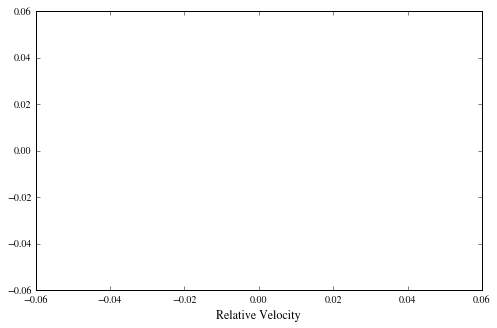

In [30]:
# Mask spectra of gUV above median 
stck_mskN = copy.deepcopy(stck_msk)
idx_mask = []
for ii,idict in enumerate(all_dict):
    if idict is None:
        continue
    if 'J1508+3635' in idict['qpq']['NAME']: #DLA not excluded by forest cut, should be excluded now
        idx_mask.append(ii) 
    c_stacked = SkyCoord(idict['qpq']['FG_RA']*u.deg,idict['qpq']['FG_DEC']*u.deg)
    gUV = QPQ9[np.where(c_stacked.separation(c_QPQ9) < 0.5*u.arcsec)[0]]['G_UV'][0]
    if gUV >= med_gUV:
        idx_mask.append(ii)
for idx in idx_mask:
    stck_mskN[idx,:] = 0.
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()

# Split in two bins of R_phys

## MgII redshift stack 

Reading /Users/lwymarie/python/enigma/enigma/data/qpq/qpq9_final.fits
Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.00016 Gb
Loaded spectra
Staged 1 spectra totalling 0.00036 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/GMOS_redux//./SDSSJ034139.19-000012.7_b1200_F.fits.gz for SDSSJ0341-0000
S/N in rest frame: 81.2002163512 1 / Angstrom


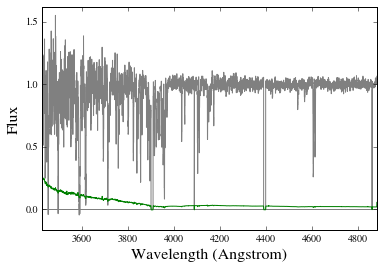

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 2.4e-05 Gb
Loaded spectra
No continuum: /u/xavier/Dropbox//QSOPairs/data/NIRI_redux//./SDSSJ080048.74+354231.3.fits
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ080048.74+354231.3_b1200_F.fits.gz for APOJ0800+3542
S/N in rest frame: 91.8284865936 1 / Angstrom


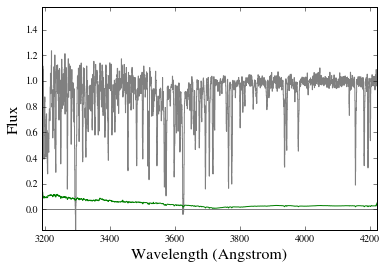

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.00016 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/GMOS_redux//./SDSSJ081420.38+325016.1_b1200_F.fits.gz for BOSSJ0814+3250
S/N in rest frame: 45.4033910613 1 / Angstrom


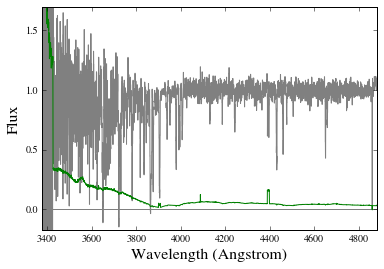

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ082844.87+454518.2_b1200_F.fits.gz for SDSSJ0828+4545
S/N in rest frame: 30.3853921563 1 / Angstrom


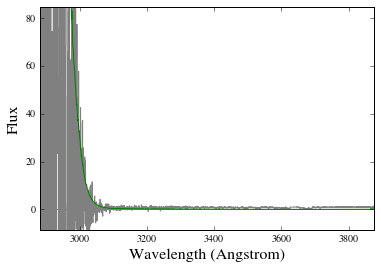

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ083757.13+383722.4_b1200_F.fits.gz for APOJ0837+3837
S/N in rest frame: 30.2325672808 1 / Angstrom


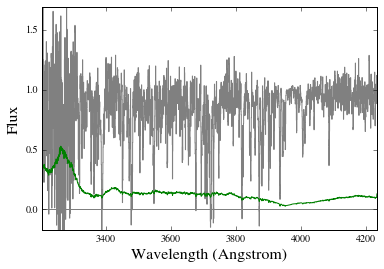

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 2.4e-05 Gb
Loaded spectra
No continuum: /u/xavier/Dropbox//QSOPairs/data/NIRI_redux//./SDSSJ084159.26+392140.0.fits
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ084159.26+392140.0_b1200_F.fits.gz for BOSSJ0841+3921
S/N in rest frame: 60.7802366381 1 / Angstrom


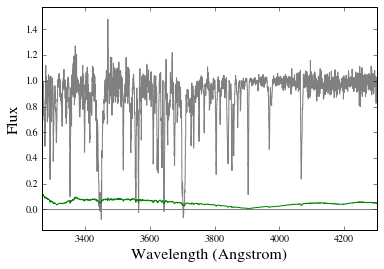

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.00036 Gb
Loaded spectra
Staged 1 spectra totalling 2.4e-05 Gb
Loaded spectra
No continuum: /u/xavier/Dropbox//QSOPairs/data/NIRSPEC_redux//./SDSSJ085357.49-001106.2.fits
Using /u/xavier/Dropbox//QSOPairs/data/MAGE_redux//./SDSSJ085357.49-001106.1_F.fits.gz for BOSSJ0853-0011
S/N in rest frame: 98.9152401339 1 / Angstrom


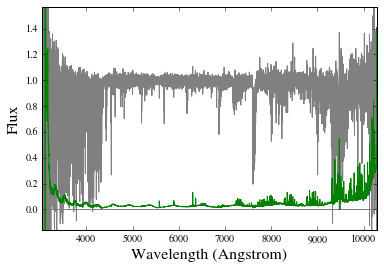

Database is QPQ
Created on 2017-Jan-31
Database is igmspec
Created on 2016-Dec-13
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
No spectrum found for BOSSJ0904+0042 and wvobs=3495.53 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
Staged 1 spectra totalling 0.00016 Gb
Loaded spectra
Staged 1 spectra totalling 0.00036 Gb
Loaded spectra
Staged 1 spectra totalling 0.0008 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/XSHOOTER_redux//./SDSSJ091338.97-010704.6_F.fits.gz for BOSSJ0913-0107
S/N in rest frame: 148.785541965 1 / Angstrom


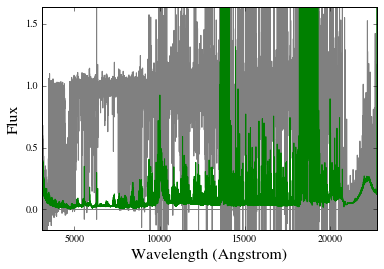

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/BOSS/v5_5_0/SDSSJ091553.38+011911.3.fits for BOSSJ0915+0119
S/N in rest frame: 10.8331445701 1 / Angstrom


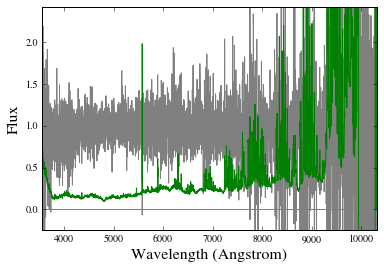

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ092416.73+392914.6_b1200_F.fits.gz for APOJ0924+3929
S/N in rest frame: 73.4837197801 1 / Angstrom


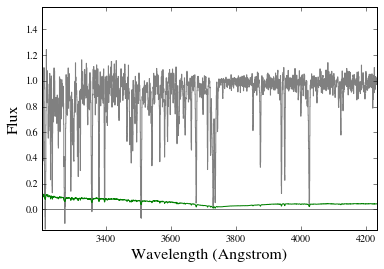

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.00036 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/MAGE_redux//./SDSSJ093225.60+092500.2_F.fits.gz for APOJ0932+0925
S/N in rest frame: 63.0893467327 1 / Angstrom


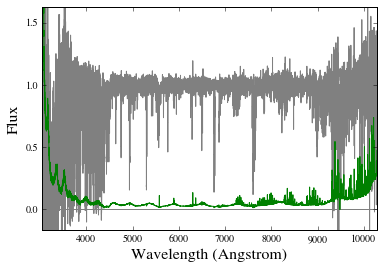

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
No spectrum found for BOSSJ1002+0020 and wvobs=4241.08 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ100507.08+501929.8_b1200_F.fits.gz for SDSSJ1005+5019
S/N in rest frame: 61.1958688467 1 / Angstrom


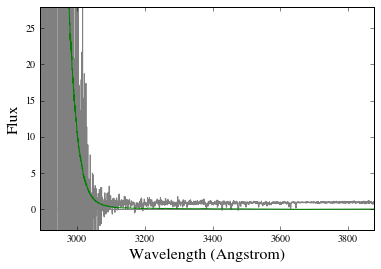

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ100940.58+250053.9_b1200_F.fits.gz for APOJ1009+2500
S/N in rest frame: 57.7116647736 1 / Angstrom


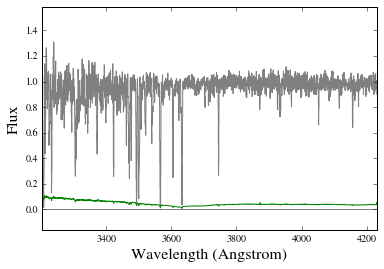

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.0007 Gb
Loaded spectra
Staged 2 spectra totalling 0.000168 Gb
Loaded spectra
No continuum: /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ102616.12+461420.8_r600_F.fits.gz
Using /u/xavier/Dropbox//QSOPairs/data/ESI_redux//./SDSSJ102616.12+461420.8_F.fits.gz for APOJ1026+4614
S/N in rest frame: 108.460526863 1 / Angstrom


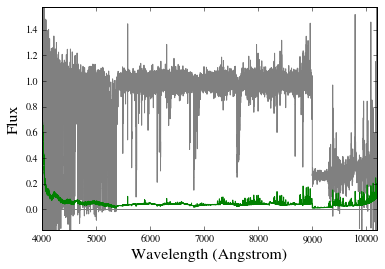

Database is QPQ
Created on 2017-Jan-31
Database is igmspec
Created on 2016-Dec-13
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using spec-6702-56381-0508.fits.gz for BOSSJ1036+5012
S/N in rest frame: 17.6500271638 1 / Angstrom


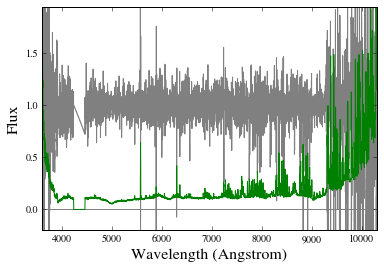

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.0007 Gb
Loaded spectra
Staged 1 spectra totalling 0.00016 Gb
Loaded spectra
Staged 2 spectra totalling 0.000168 Gb
Loaded spectra
No continuum: /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ103900.01+502652.8_r600_F.fits.gz
Using /u/xavier/Dropbox//QSOPairs/data/ESI_redux//./SDSSJ103900.01+502652.8_F.fits.gz for BOSSJ1039+5026
S/N in rest frame: 56.6214986074 1 / Angstrom


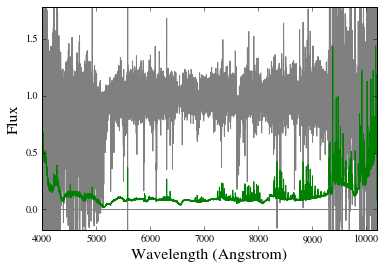

Database is QPQ
Created on 2017-Jan-31
Database is igmspec
Created on 2016-Dec-13
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using spec-7083-56722-0068.fits.gz for BOSSJ1042+6459
S/N in rest frame: 12.9992594248 1 / Angstrom


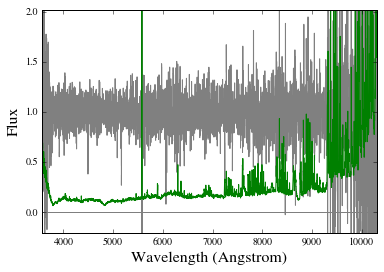

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.00016 Gb
Loaded spectra
Staged 2 spectra totalling 0.000168 Gb
Loaded spectra
Staged 1 spectra totalling 0.0008 Gb
Loaded spectra
No continuum: /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ114145.43+072423.3_b400_F.fits.gz
No continuum: /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ114145.43+072423.3_r600_F.fits.gz
Using /u/xavier/Dropbox//QSOPairs/data/GMOS_redux//./SDSSJ114145.43+072423.3_b600_F.fits.gz for APOJ1141+0724
S/N in rest frame: 51.903728653 1 / Angstrom


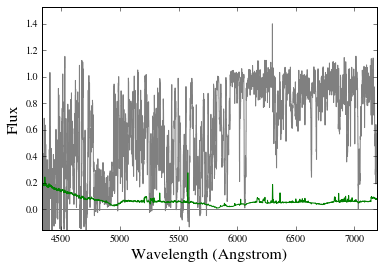

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.0007 Gb
Loaded spectra
Staged 1 spectra totalling 0.00036 Gb
Loaded spectra
Staged 3 spectra totalling 0.00612 Gb
Loaded spectra
No continuum: /u/xavier/Dropbox//QSOPairs/data/MIKE_redux//./SDSSJ114436.65+095904.9_spl_F.fits.gz
Using /u/xavier/Dropbox//QSOPairs/data/MIKE_redux//./SDSSJ114436.65+095904.9_r_F.fits.gz for BOSSJ1144+0959
S/N in rest frame: 182.960972292 1 / Angstrom


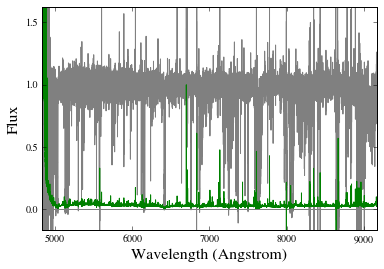

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.00016 Gb
Loaded spectra
Staged 1 spectra totalling 0.00144 Gb
Loaded spectra
Staged 1 spectra totalling 0.00036 Gb
Loaded spectra
No continuum: /u/xavier/Dropbox//QSOPairs/data/GMOS_redux//./SDSSJ120416.69+022111.0_b1200_F.fits.gz
No continuum: /u/xavier/Dropbox//QSOPairs/data/HIRES_redux//./SDSSJ120416.69+022111.0_f.fits.gz
Using conti=1 for HIRES
Using /u/xavier/Dropbox//QSOPairs/data/HIRES_redux//./SDSSJ120416.69+022111.0_f.fits.gz for BOSSJ1204+0221
S/N in rest frame: 142.737660247 1 / Angstrom


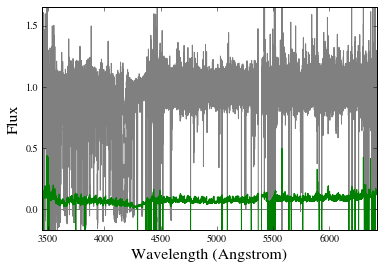

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 2.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
No continuum: /u/xavier/Dropbox//QSOPairs/data/NIRI_redux//./SDSSJ121558.82+571555.6.fits
Using /u/xavier/Dropbox//QSOPairs/data/SDSS//./SDSSJ121558.80+571555.4.fits.gz for BOSSJ1215+5715
S/N in rest frame: 15.4003819102 1 / Angstrom


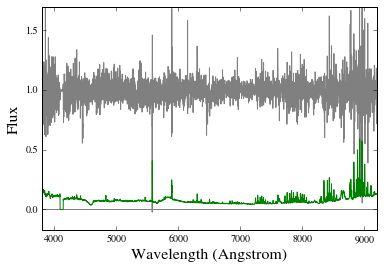

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
Staged 1 spectra totalling 0.00016 Gb
Loaded spectra
Staged 2 spectra totalling 0.000168 Gb
Loaded spectra
Staged 1 spectra totalling 0.0008 Gb
Loaded spectra
No continuum: /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ123141.73+002913.9_r600_F.fits.gz
Using /u/xavier/Dropbox//QSOPairs/data/GMOS_redux//./SDSSJ123141.73+002913.9_b600_F.fits.gz for BOSSJ1231+0029
S/N in rest frame: 78.1900954682 1 / Angstrom


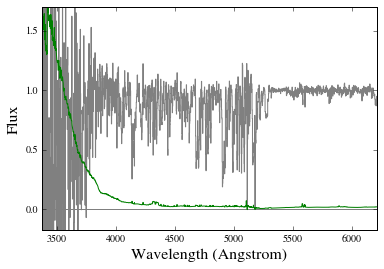

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ130603.55+615835.2_b1200_F.fits.gz for APOJ1306+6158
S/N in rest frame: 32.2260362938 1 / Angstrom


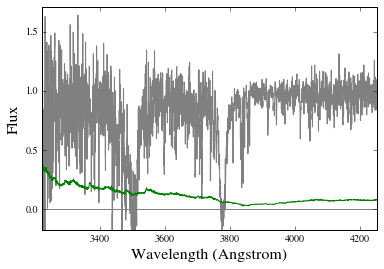

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ135849.55+273756.9_b1200_F.fits.gz for APOJ1358+2737
S/N in rest frame: 52.9957482164 1 / Angstrom


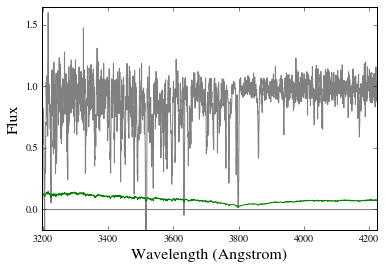

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 0.00036 Gb
Loaded spectra
Staged 1 spectra totalling 2.4e-05 Gb
Loaded spectra
No continuum: /u/xavier/Dropbox//QSOPairs/data/NIRI_redux//./SDSSJ142054.92+160342.9.fits
Using /u/xavier/Dropbox//QSOPairs/data/MAGE_redux//./SDSSJ142054.92+160342.9_F.fits.gz for APOJ1420+1603
S/N in rest frame: 43.9229497219 1 / Angstrom


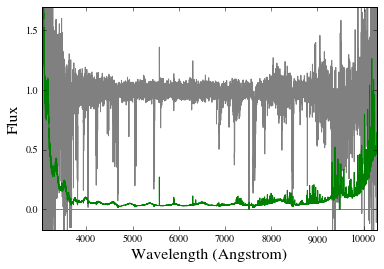

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.00016 Gb
Loaded spectra
Staged 1 spectra totalling 0.00036 Gb
Loaded spectra
Staged 3 spectra totalling 0.00612 Gb
Loaded spectra
No continuum: /u/xavier/Dropbox//QSOPairs/data/GMOS_redux//./SDSSJ142758.74-012136.2_b1200_F.fits.gz
No continuum: /u/xavier/Dropbox//QSOPairs/data/MIKE_redux//./SDSSJ142758.74-012136.2_r_F.fits.gz
No continuum: /u/xavier/Dropbox//QSOPairs/data/MIKE_redux//./SDSSJ142758.74-012136.2_spl_F.fits.gz
Using /u/xavier/Dropbox//QSOPairs/data/MIKE_redux//./SDSSJ142758.74-012136.2_b_F.fits.gz for BOSSJ1427-0121
S/N in rest frame: 138.590413393 1 / Angstrom


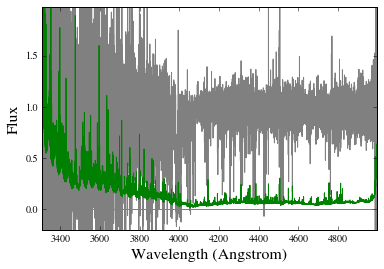

Database is QPQ
Created on 2017-Jan-31
Staged 3 spectra totalling 0.0003 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/BOSS/v5_7_0/SDSSJ143344.55+064111.9.fits for BOSSJ1433+0641
S/N in rest frame: 23.5414388907 1 / Angstrom


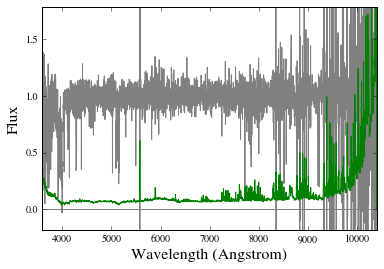

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 0.00036 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/MAGE_redux//./SDSSJ155325.89+192137.7_F.fits.gz for APOJ1553+1921
S/N in rest frame: 22.1545285855 1 / Angstrom


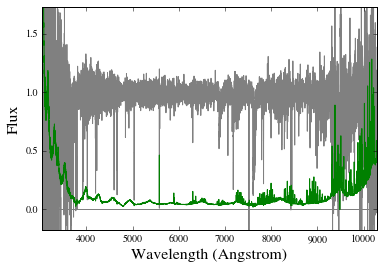

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ155946.28+494326.5_b1200_F.fits.gz for APOJ1559+4943
S/N in rest frame: 24.839736758 1 / Angstrom


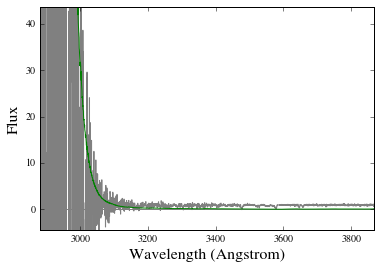

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ160546.67+511322.9_b1200_F.fits.gz for BOSSJ1605+5113
S/N in rest frame: 41.9828485416 1 / Angstrom


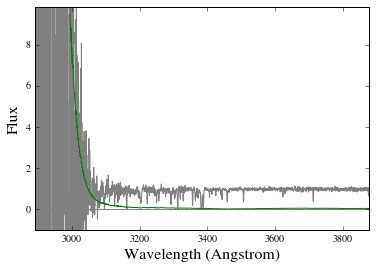

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.0007 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/ESI_redux//./SDSSJ162737.25+460609.3_F.fits.gz for APOJ1627+4606
S/N in rest frame: 121.115520708 1 / Angstrom


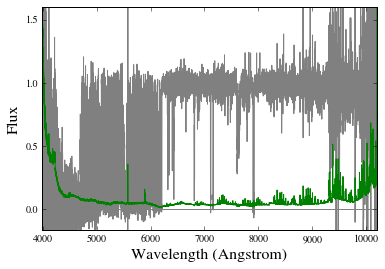

In [31]:
# Find median R_phys
stack_tup0 = qpq9k.qpq9_IRMgII(passback=True,wrest=1334.5323*u.AA,S2N_cut=5.5/u.AA,zfg_mnx=(1.6,9999))
fin_velo, stck_img, stck_msk, all_dict = stack_tup0
sv_Rphys = []
for idict in all_dict:
    if idict == None:
        continue
    c_stacked = SkyCoord(idict['qpq']['FG_RA']*u.deg,idict['qpq']['FG_DEC']*u.deg)
    sv_Rphys.append(QPQ9[np.where(c_stacked.separation(c_QPQ9) < 0.5*u.arcsec)[0]]['R_PHYS'][0])
med_Rphys = np.median(sv_Rphys)

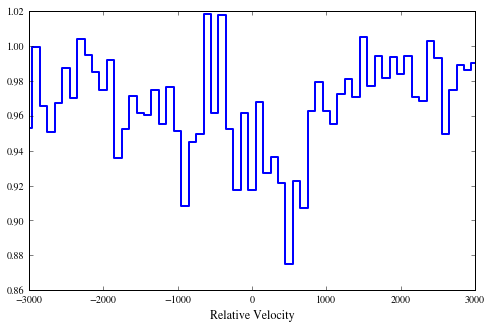

In [32]:
# Mask spectra of R_phys below median 
stck_mskN = copy.deepcopy(stck_msk)
idx_mask = []
for ii,idict in enumerate(all_dict):
    if idict is None:
        continue
    if 'J1508+3635' in idict['qpq']['NAME']: #DLA not excluded by forest cut, should be excluded now
        idx_mask.append(ii) 
    c_stacked = SkyCoord(idict['qpq']['FG_RA']*u.deg,idict['qpq']['FG_DEC']*u.deg)
    R_phys = QPQ9[np.where(c_stacked.separation(c_QPQ9) < 0.5*u.arcsec)[0]]['R_PHYS'][0]
    if R_phys <= med_Rphys:
        idx_mask.append(ii)
for idx in idx_mask:
    stck_mskN[idx,:] = 0.
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()

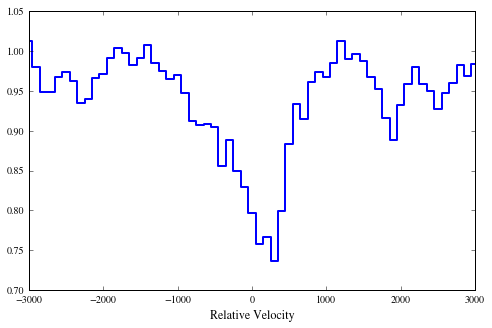

In [33]:
# Mask spectra of R_phys above median 
stck_mskN = copy.deepcopy(stck_msk)
idx_mask = []
for ii,idict in enumerate(all_dict):
    if idict is None:
        continue
    if 'J1508+3635' in idict['qpq']['NAME']: #DLA not excluded by forest cut, should be excluded now
        idx_mask.append(ii) 
    c_stacked = SkyCoord(idict['qpq']['FG_RA']*u.deg,idict['qpq']['FG_DEC']*u.deg)
    R_phys = QPQ9[np.where(c_stacked.separation(c_QPQ9) < 0.5*u.arcsec)[0]]['R_PHYS'][0]
    if R_phys >= med_Rphys:
        idx_mask.append(ii)
for idx in idx_mask:
    stck_mskN[idx,:] = 0.
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()

## [OIII] redshift stack

In [34]:
# Find median R_phys
stack_tup0 = qpq9k.qpq9_IRMgII(passback=True,wrest=1334.5323*u.AA,vsig_cut=50*u.km/u.s,S2N_cut=5.5/u.AA,zfg_mnx=(1.6,9999))
fin_velo, stck_img, stck_msk, all_dict = stack_tup0
sv_Rphys = []
for idict in all_dict:
    if idict == None:
        continue
    c_stacked = SkyCoord(idict['qpq']['FG_RA']*u.deg,idict['qpq']['FG_DEC']*u.deg)
    sv_Rphys.append(QPQ9[np.where(c_stacked.separation(c_QPQ9) < 0.5*u.arcsec)[0]]['R_PHYS'][0])
med_Rphys = np.median(sv_Rphys)

Reading /Users/lwymarie/python/enigma/enigma/data/qpq/qpq9_final.fits


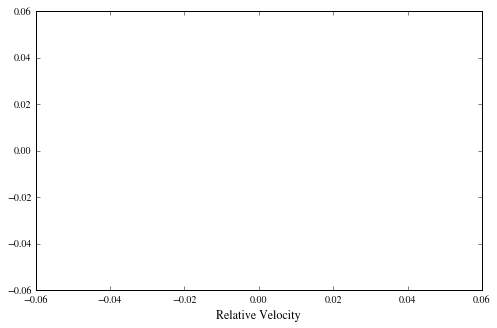

In [35]:
# Mask spectra of R_phys below median 
stck_mskN = copy.deepcopy(stck_msk)
idx_mask = []
for ii,idict in enumerate(all_dict):
    if idict is None:
        continue
    if 'J1508+3635' in idict['qpq']['NAME']: #DLA not excluded by forest cut, should be excluded now
        idx_mask.append(ii) 
    c_stacked = SkyCoord(idict['qpq']['FG_RA']*u.deg,idict['qpq']['FG_DEC']*u.deg)
    R_phys = QPQ9[np.where(c_stacked.separation(c_QPQ9) < 0.5*u.arcsec)[0]]['R_PHYS'][0]
    if R_phys <= med_Rphys:
        idx_mask.append(ii)
for idx in idx_mask:
    stck_mskN[idx,:] = 0.
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()

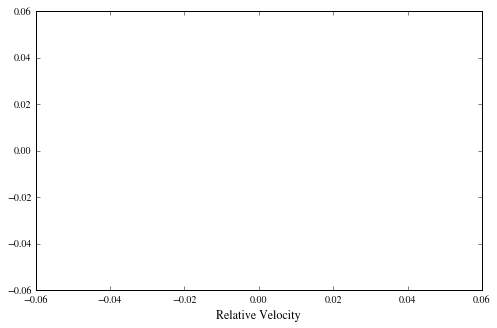

In [36]:
# Mask spectra of R_phys above median 
stck_mskN = copy.deepcopy(stck_msk)
idx_mask = []
for ii,idict in enumerate(all_dict):
    if idict is None:
        continue
    if 'J1508+3635' in idict['qpq']['NAME']: #DLA not excluded by forest cut, should be excluded now
        idx_mask.append(ii) 
    c_stacked = SkyCoord(idict['qpq']['FG_RA']*u.deg,idict['qpq']['FG_DEC']*u.deg)
    R_phys = QPQ9[np.where(c_stacked.separation(c_QPQ9) < 0.5*u.arcsec)[0]]['R_PHYS'][0]
    if R_phys >= med_Rphys:
        idx_mask.append(ii)
for idx in idx_mask:
    stck_mskN[idx,:] = 0.
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()

# Split in two bins of velocity separations 

## MgII redshift stack 

Reading /Users/lwymarie/python/enigma/enigma/data/qpq/qpq9_final.fits
Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.00016 Gb
Loaded spectra
Staged 1 spectra totalling 0.00036 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/GMOS_redux//./SDSSJ034139.19-000012.7_b1200_F.fits.gz for SDSSJ0341-0000
S/N in rest frame: 81.2002163512 1 / Angstrom


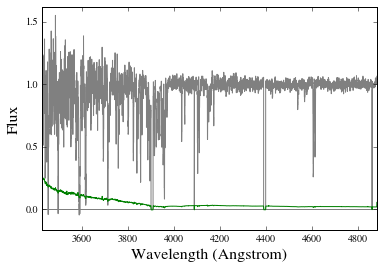

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 2.4e-05 Gb
Loaded spectra
No continuum: /u/xavier/Dropbox//QSOPairs/data/NIRI_redux//./SDSSJ080048.74+354231.3.fits
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ080048.74+354231.3_b1200_F.fits.gz for APOJ0800+3542
S/N in rest frame: 91.8284865936 1 / Angstrom


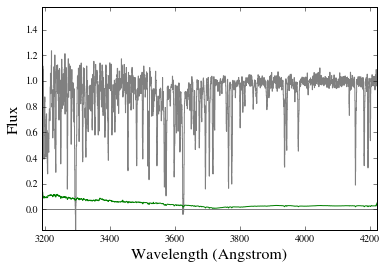

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.00016 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/GMOS_redux//./SDSSJ081420.38+325016.1_b1200_F.fits.gz for BOSSJ0814+3250
S/N in rest frame: 45.4033910613 1 / Angstrom


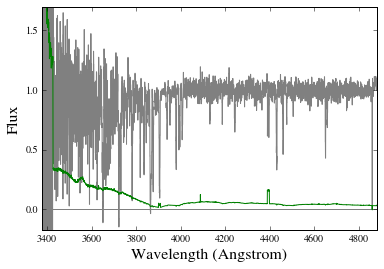

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ082844.87+454518.2_b1200_F.fits.gz for SDSSJ0828+4545
S/N in rest frame: 30.3853921563 1 / Angstrom


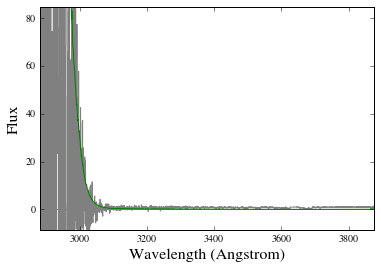

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ083757.13+383722.4_b1200_F.fits.gz for APOJ0837+3837
S/N in rest frame: 30.2325672808 1 / Angstrom


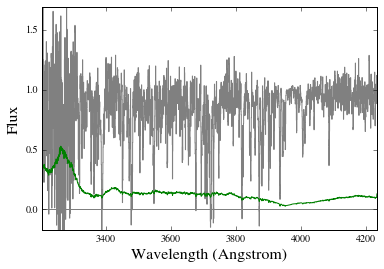

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 2.4e-05 Gb
Loaded spectra
No continuum: /u/xavier/Dropbox//QSOPairs/data/NIRI_redux//./SDSSJ084159.26+392140.0.fits
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ084159.26+392140.0_b1200_F.fits.gz for BOSSJ0841+3921
S/N in rest frame: 60.7802366381 1 / Angstrom


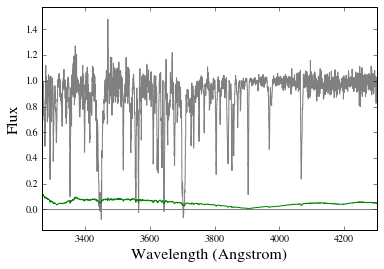

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.00036 Gb
Loaded spectra
Staged 1 spectra totalling 2.4e-05 Gb
Loaded spectra
No continuum: /u/xavier/Dropbox//QSOPairs/data/NIRSPEC_redux//./SDSSJ085357.49-001106.2.fits
Using /u/xavier/Dropbox//QSOPairs/data/MAGE_redux//./SDSSJ085357.49-001106.1_F.fits.gz for BOSSJ0853-0011
S/N in rest frame: 98.9152401339 1 / Angstrom


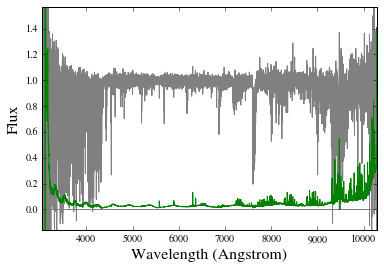

Database is QPQ
Created on 2017-Jan-31
Database is igmspec
Created on 2016-Dec-13
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
No spectrum found for BOSSJ0904+0042 and wvobs=3495.53 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
Staged 1 spectra totalling 0.00016 Gb
Loaded spectra
Staged 1 spectra totalling 0.00036 Gb
Loaded spectra
Staged 1 spectra totalling 0.0008 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/XSHOOTER_redux//./SDSSJ091338.97-010704.6_F.fits.gz for BOSSJ0913-0107
S/N in rest frame: 148.785541965 1 / Angstrom


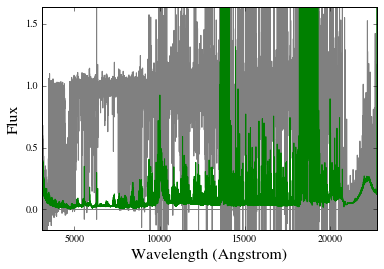

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/BOSS/v5_5_0/SDSSJ091553.38+011911.3.fits for BOSSJ0915+0119
S/N in rest frame: 10.8331445701 1 / Angstrom


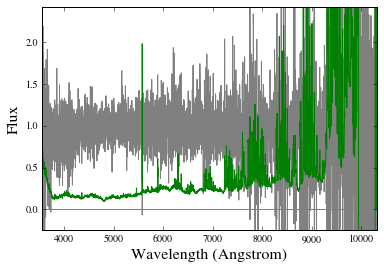

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ092416.73+392914.6_b1200_F.fits.gz for APOJ0924+3929
S/N in rest frame: 73.4837197801 1 / Angstrom


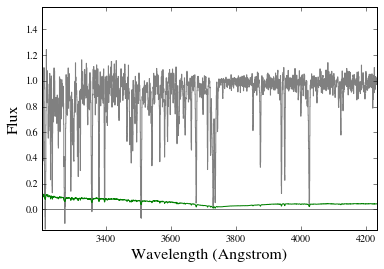

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.00036 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/MAGE_redux//./SDSSJ093225.60+092500.2_F.fits.gz for APOJ0932+0925
S/N in rest frame: 63.0893467327 1 / Angstrom


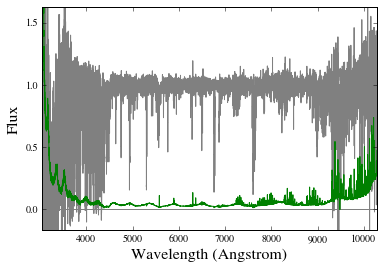

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
No spectrum found for BOSSJ1002+0020 and wvobs=4241.08 Angstrom!
Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ100507.08+501929.8_b1200_F.fits.gz for SDSSJ1005+5019
S/N in rest frame: 61.1958688467 1 / Angstrom


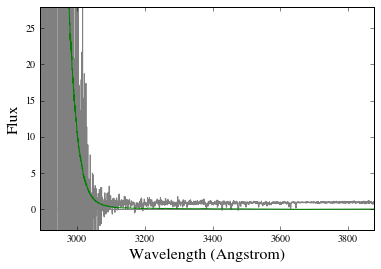

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ100940.58+250053.9_b1200_F.fits.gz for APOJ1009+2500
S/N in rest frame: 57.7116647736 1 / Angstrom


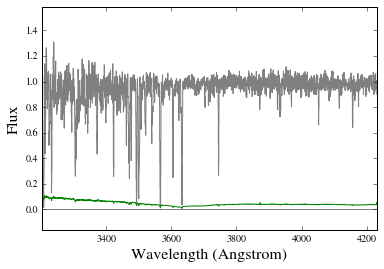

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.0007 Gb
Loaded spectra
Staged 2 spectra totalling 0.000168 Gb
Loaded spectra
No continuum: /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ102616.12+461420.8_r600_F.fits.gz
Using /u/xavier/Dropbox//QSOPairs/data/ESI_redux//./SDSSJ102616.12+461420.8_F.fits.gz for APOJ1026+4614
S/N in rest frame: 108.460526863 1 / Angstrom


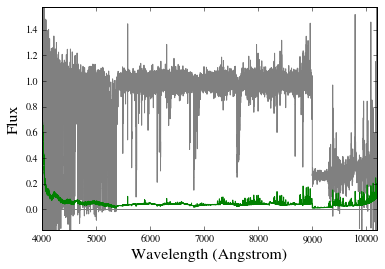

Database is QPQ
Created on 2017-Jan-31
Database is igmspec
Created on 2016-Dec-13
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using spec-6702-56381-0508.fits.gz for BOSSJ1036+5012
S/N in rest frame: 17.6500271638 1 / Angstrom


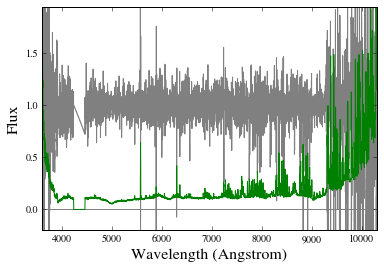

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.0007 Gb
Loaded spectra
Staged 1 spectra totalling 0.00016 Gb
Loaded spectra
Staged 2 spectra totalling 0.000168 Gb
Loaded spectra
No continuum: /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ103900.01+502652.8_r600_F.fits.gz
Using /u/xavier/Dropbox//QSOPairs/data/ESI_redux//./SDSSJ103900.01+502652.8_F.fits.gz for BOSSJ1039+5026
S/N in rest frame: 56.6214986074 1 / Angstrom


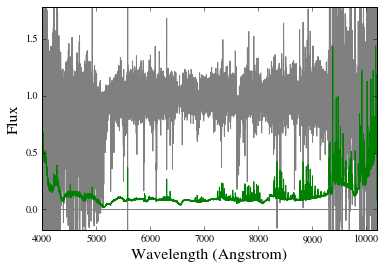

Database is QPQ
Created on 2017-Jan-31
Database is igmspec
Created on 2016-Dec-13
Staged 1 spectra totalling 9.3e-05 Gb
Loaded spectra
Using spec-7083-56722-0068.fits.gz for BOSSJ1042+6459
S/N in rest frame: 12.9992594248 1 / Angstrom


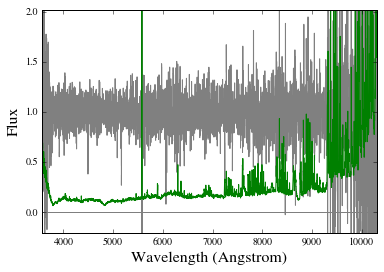

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.00016 Gb
Loaded spectra
Staged 2 spectra totalling 0.000168 Gb
Loaded spectra
Staged 1 spectra totalling 0.0008 Gb
Loaded spectra
No continuum: /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ114145.43+072423.3_b400_F.fits.gz
No continuum: /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ114145.43+072423.3_r600_F.fits.gz
Using /u/xavier/Dropbox//QSOPairs/data/GMOS_redux//./SDSSJ114145.43+072423.3_b600_F.fits.gz for APOJ1141+0724
S/N in rest frame: 51.903728653 1 / Angstrom


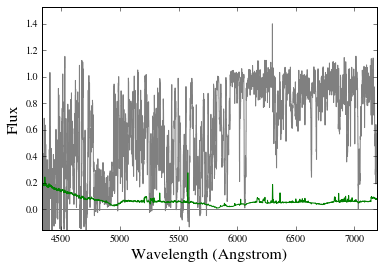

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.0007 Gb
Loaded spectra
Staged 1 spectra totalling 0.00036 Gb
Loaded spectra
Staged 3 spectra totalling 0.00612 Gb
Loaded spectra
No continuum: /u/xavier/Dropbox//QSOPairs/data/MIKE_redux//./SDSSJ114436.65+095904.9_spl_F.fits.gz
Using /u/xavier/Dropbox//QSOPairs/data/MIKE_redux//./SDSSJ114436.65+095904.9_r_F.fits.gz for BOSSJ1144+0959
S/N in rest frame: 182.960972292 1 / Angstrom


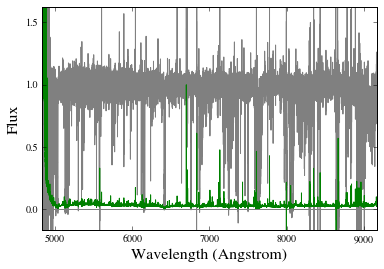

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.00016 Gb
Loaded spectra
Staged 1 spectra totalling 0.00144 Gb
Loaded spectra
Staged 1 spectra totalling 0.00036 Gb
Loaded spectra
No continuum: /u/xavier/Dropbox//QSOPairs/data/GMOS_redux//./SDSSJ120416.69+022111.0_b1200_F.fits.gz
No continuum: /u/xavier/Dropbox//QSOPairs/data/HIRES_redux//./SDSSJ120416.69+022111.0_f.fits.gz
Using conti=1 for HIRES
Using /u/xavier/Dropbox//QSOPairs/data/HIRES_redux//./SDSSJ120416.69+022111.0_f.fits.gz for BOSSJ1204+0221
S/N in rest frame: 142.737660247 1 / Angstrom


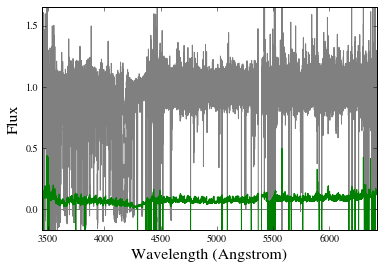

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 2.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 8e-05 Gb
Loaded spectra
No continuum: /u/xavier/Dropbox//QSOPairs/data/NIRI_redux//./SDSSJ121558.82+571555.6.fits
Using /u/xavier/Dropbox//QSOPairs/data/SDSS//./SDSSJ121558.80+571555.4.fits.gz for BOSSJ1215+5715
S/N in rest frame: 15.4003819102 1 / Angstrom


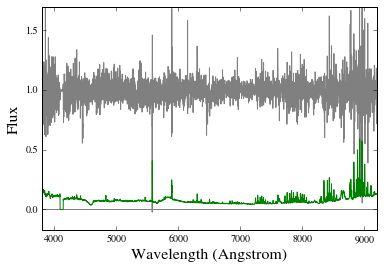

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
Staged 1 spectra totalling 0.00016 Gb
Loaded spectra
Staged 2 spectra totalling 0.000168 Gb
Loaded spectra
Staged 1 spectra totalling 0.0008 Gb
Loaded spectra
No continuum: /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ123141.73+002913.9_r600_F.fits.gz
Using /u/xavier/Dropbox//QSOPairs/data/GMOS_redux//./SDSSJ123141.73+002913.9_b600_F.fits.gz for BOSSJ1231+0029
S/N in rest frame: 78.1900954682 1 / Angstrom


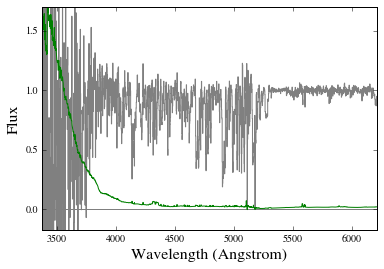

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ130603.55+615835.2_b1200_F.fits.gz for APOJ1306+6158
S/N in rest frame: 32.2260362938 1 / Angstrom


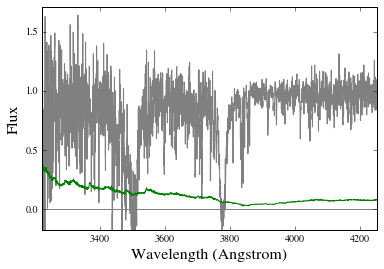

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ135849.55+273756.9_b1200_F.fits.gz for APOJ1358+2737
S/N in rest frame: 52.9957482164 1 / Angstrom


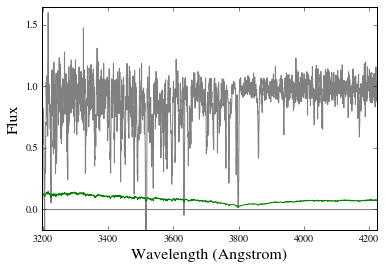

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 0.00036 Gb
Loaded spectra
Staged 1 spectra totalling 2.4e-05 Gb
Loaded spectra
No continuum: /u/xavier/Dropbox//QSOPairs/data/NIRI_redux//./SDSSJ142054.92+160342.9.fits
Using /u/xavier/Dropbox//QSOPairs/data/MAGE_redux//./SDSSJ142054.92+160342.9_F.fits.gz for APOJ1420+1603
S/N in rest frame: 43.9229497219 1 / Angstrom


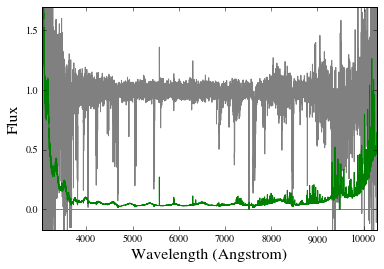

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.00016 Gb
Loaded spectra
Staged 1 spectra totalling 0.00036 Gb
Loaded spectra
Staged 3 spectra totalling 0.00612 Gb
Loaded spectra
No continuum: /u/xavier/Dropbox//QSOPairs/data/GMOS_redux//./SDSSJ142758.74-012136.2_b1200_F.fits.gz
No continuum: /u/xavier/Dropbox//QSOPairs/data/MIKE_redux//./SDSSJ142758.74-012136.2_r_F.fits.gz
No continuum: /u/xavier/Dropbox//QSOPairs/data/MIKE_redux//./SDSSJ142758.74-012136.2_spl_F.fits.gz
Using /u/xavier/Dropbox//QSOPairs/data/MIKE_redux//./SDSSJ142758.74-012136.2_b_F.fits.gz for BOSSJ1427-0121
S/N in rest frame: 138.590413393 1 / Angstrom


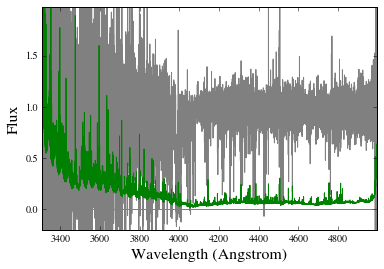

Database is QPQ
Created on 2017-Jan-31
Staged 3 spectra totalling 0.0003 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/BOSS/v5_7_0/SDSSJ143344.55+064111.9.fits for BOSSJ1433+0641
S/N in rest frame: 23.5414388907 1 / Angstrom


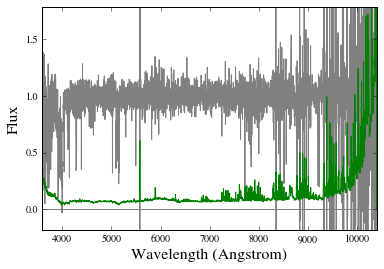

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Staged 1 spectra totalling 0.00036 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/MAGE_redux//./SDSSJ155325.89+192137.7_F.fits.gz for APOJ1553+1921
S/N in rest frame: 22.1545285855 1 / Angstrom


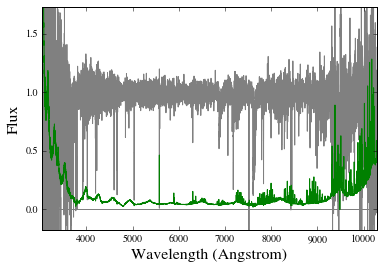

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ155946.28+494326.5_b1200_F.fits.gz for APOJ1559+4943
S/N in rest frame: 24.839736758 1 / Angstrom


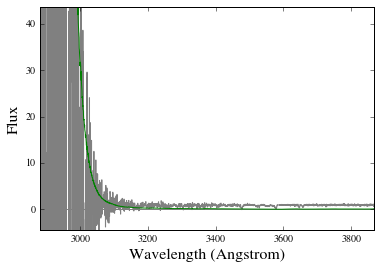

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.0001 Gb
Loaded spectra
Staged 1 spectra totalling 8.4e-05 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/LRIS_redux//./SDSSJ160546.67+511322.9_b1200_F.fits.gz for BOSSJ1605+5113
S/N in rest frame: 41.9828485416 1 / Angstrom


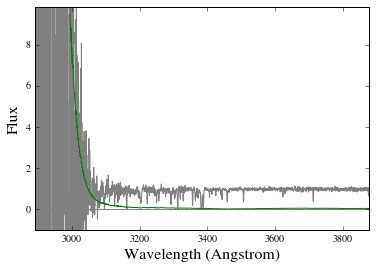

Database is QPQ
Created on 2017-Jan-31
Staged 1 spectra totalling 0.0007 Gb
Loaded spectra
Using /u/xavier/Dropbox//QSOPairs/data/ESI_redux//./SDSSJ162737.25+460609.3_F.fits.gz for APOJ1627+4606
S/N in rest frame: 121.115520708 1 / Angstrom


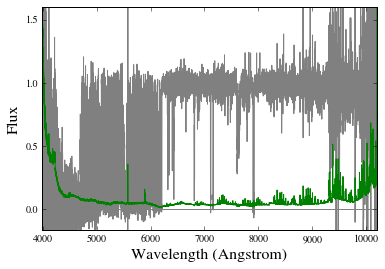

DeprecationWarning: This function is deprecated, please use dv_from_z() instead.

In [37]:
# Find median velocity separation 
stack_tup0 = qpq9k.qpq9_IRMgII(passback=True,wrest=1334.5323*u.AA,S2N_cut=5.5/u.AA,zfg_mnx=(1.6,9999),atmosphere_cut=True)
fin_velo, stck_img, stck_msk, all_dict = stack_tup0
sv_dv = []
for idict in all_dict:
    if idict == None:
        continue
    sv_dv.append(ltu.v_from_z(idict['qpq']['BG_Z'],idict['qpq']['Z_FG']).value)
med_dv = np.median(sv_dv)

In [ ]:
# Mask spectra of velocity separation below median 
stck_mskN = copy.deepcopy(stck_msk)
idx_mask = []
sv_z = []
for ii,idict in enumerate(all_dict):
    if idict is None:
        continue
    if 'J1508+3635' in idict['qpq']['NAME']: #DLA not excluded by forest cut, should be excluded now
        idx_mask.append(ii) 
    dv = ltu.v_from_z(idict['qpq']['BG_Z'],idict['qpq']['Z_FG']).value
    if dv <= med_dv:
        idx_mask.append(ii)
        sv_z.append(idict['qpq']['Z_FG'])
for idx in idx_mask:
    stck_mskN[idx,:] = 0.
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()
print('median z_fg of this stack =',np.median(sv_z))

In [ ]:
# Mask spectra of velocity separation above median 
stck_mskN = copy.deepcopy(stck_msk)
idx_mask = []
sv_z = []
for ii,idict in enumerate(all_dict):
    if idict is None:
        continue
    if 'J1508+3635' in idict['qpq']['NAME']: #DLA not excluded by forest cut, should be excluded now
        idx_mask.append(ii) 
    dv = ltu.v_from_z(idict['qpq']['BG_Z'],idict['qpq']['Z_FG']).value
    if dv >= med_dv:
        idx_mask.append(ii)
        sv_z.append(idict['qpq']['Z_FG'])
for idx in idx_mask:
    stck_mskN[idx,:] = 0.
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()
print('median z_fg of this stack =',np.median(sv_z))

## [OIII] redshift stack

In [ ]:
# Find median velocity separation 
stack_tup0 = qpq9k.qpq9_IRMgII(passback=True,wrest=1334.5323*u.AA,vsig_cut=50*u.km/u.s,S2N_cut=5.5/u.AA,zfg_mnx=(1.6,9999))
fin_velo, stck_img, stck_msk, all_dict = stack_tup0
sv_dv = []
for idict in all_dict:
    if idict == None:
        continue
    sv_dv.append(ltu.v_from_z(idict['qpq']['BG_Z'],idict['qpq']['Z_FG']).value)
print(sv_dv)
med_dv = np.median(sv_dv)

In [ ]:
# Mask spectra of velocity separation below median 
stck_mskN = copy.deepcopy(stck_msk)
idx_mask = []
sv_z = []
for ii,idict in enumerate(all_dict):
    if idict is None:
        continue
    if 'J1508+3635' in idict['qpq']['NAME']: #DLA not excluded by forest cut, should be excluded now
        idx_mask.append(ii) 
    dv = ltu.v_from_z(idict['qpq']['BG_Z'],idict['qpq']['Z_FG']).value
    if dv <= med_dv:
        idx_mask.append(ii)
        sv_z.append(idict['qpq']['Z_FG'])
for idx in idx_mask:
    stck_mskN[idx,:] = 0.
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()
print('median z_fg of this stack =',np.median(sv_z))

In [ ]:
# Mask spectra of velocity separation above median 
stck_mskN = copy.deepcopy(stck_msk)
idx_mask = []
sv_z = []
for ii,idict in enumerate(all_dict):
    if idict is None:
        continue
    if 'J1508+3635' in idict['qpq']['NAME']: #DLA not excluded by forest cut, should be excluded now
        idx_mask.append(ii) 
    dv = ltu.v_from_z(idict['qpq']['BG_Z'],idict['qpq']['Z_FG']).value
    if dv >= med_dv:
        idx_mask.append(ii)
        sv_z.append(idict['qpq']['Z_FG'])
for idx in idx_mask:
    stck_mskN[idx,:] = 0.
stack_tup = (fin_velo, stck_img, stck_mskN, all_dict)
fin_velo, fin_flx, all_dict = qpqk.stack_avg(stack_tup)
plt.figure(figsize=(8,5),dpi=1200)
plt.plot(fin_velo, fin_flx, drawstyle='steps-mid',linewidth=2.)
plt.xlabel('Relative Velocity', size=12.)
plt.show()
print('median z_fg of this stack =',np.median(sv_z))